In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.shape

(933762, 27)

I will be making a copy of the original data called df and do analysis on it

In [ ]:
df = data.copy()
df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,...,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday
0,2021-09-11,2:39,unknown,unknown,40.72773,-73.921295,unknown,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,Aggressive Driving/Road Rage,Unspecified,4455765.0,Sedan,Sedan,injury_only,2021.0,9.0,11.0,5.0
1,2022-03-26,11:45,unknown,unknown,40.72773,-73.921295,unknown,other,unknown,1.0,...,Pavement Slippery,unknown,4513547.0,Sedan,unknown,injury_only,2022.0,3.0,26.0,5.0
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,...,Unspecified,Unspecified,4675373.0,Moped,Sedan,injury_only,2023.0,11.0,1.0,2.0
3,2022-06-29,6:55,unknown,unknown,40.72773,-73.921295,unknown,THROGS NECK BRIDGE,unknown,0.0,...,Following Too Closely,Unspecified,4541903.0,Sedan,Pick-up Truck,no_casualty,2022.0,6.0,29.0,2.0
4,2022-09-21,13:21,unknown,unknown,40.72773,-73.921295,unknown,BROOKLYN BRIDGE,unknown,0.0,...,Passing Too Closely,Unspecified,4566131.0,Station Wagon/Sport Utility Vehicle,unknown,no_casualty,2022.0,9.0,21.0,2.0


In [ ]:
df.shape

(933762, 27)

So around 27 features, lets check the data types and the missing percentages of feature

In [ ]:
for feat in df.columns:
  print(feat, df[feat].dtype, df[feat].isna().mean())

crash date object 0.0
crash time object 0.0
borough object 0.0
zip code object 0.0
latitude float64 0.0
longitude float64 0.0
location object 0.0
on street name object 0.0
cross street name object 1.0709367054988315e-06
number of persons injured float64 1.0709367054988315e-06
number of persons killed float64 1.0709367054988315e-06
number of pedestrians injured float64 1.0709367054988315e-06
number of pedestrians killed float64 1.0709367054988315e-06
number of cyclist injured float64 1.0709367054988315e-06
number of cyclist killed float64 1.0709367054988315e-06
number of motorist injured float64 1.0709367054988315e-06
number of motorist killed float64 1.0709367054988315e-06
contributing factor vehicle 1 object 1.0709367054988315e-06
contributing factor vehicle 2 object 1.0709367054988315e-06
collision_id float64 1.0709367054988315e-06
vehicle type code 1 object 1.0709367054988315e-06
vehicle type code 2 object 1.0709367054988315e-06
severity object 1.0709367054988315e-06
year float64 1.

Since the missing percentage is very small and the dataset is relatively large then I will simply drop these missing values


In [ ]:
for feat in df.columns:
  if df[feat].isna().mean() > 0:
    df.dropna(subset=[feat], inplace=True)

Now I will create another column called severity_score which will check if there are any people that are killed or injured, basically a mathematical formula:
severity_score = killed*3('assigning signifance to fatality relative to injured') + injured

In [ ]:
df['severity_score'] = (df['number of pedestrians injured'] + df['number of motorist injured'] + df['number of cyclist injured'] + df['number of persons injured']) + (df['number of pedestrians killed'] + df['number of motorist killed'] + df['number of cyclist killed'] + df['number of persons killed'])*3

df.head(50)

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,...,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday,severity_score
0,2021-09-11,2:39,unknown,unknown,40.727730,-73.921295,unknown,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,Unspecified,4455765.0,Sedan,Sedan,injury_only,2021.0,9.0,11.0,5.0,4.0
1,2022-03-26,11:45,unknown,unknown,40.727730,-73.921295,unknown,other,unknown,1.0,...,unknown,4513547.0,Sedan,unknown,injury_only,2022.0,3.0,26.0,5.0,2.0
2,2023-11-01,1:29,BROOKLYN,11230,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,...,Unspecified,4675373.0,Moped,Sedan,injury_only,2023.0,11.0,1.0,2.0,2.0
3,2022-06-29,6:55,unknown,unknown,40.727730,-73.921295,unknown,THROGS NECK BRIDGE,unknown,0.0,...,Unspecified,4541903.0,Sedan,Pick-up Truck,no_casualty,2022.0,6.0,29.0,2.0,0.0
4,2022-09-21,13:21,unknown,unknown,40.727730,-73.921295,unknown,BROOKLYN BRIDGE,unknown,0.0,...,Unspecified,4566131.0,Station Wagon/Sport Utility Vehicle,unknown,no_casualty,2022.0,9.0,21.0,2.0,0.0
5,2023-04-26,13:30,unknown,unknown,40.727730,-73.921295,unknown,other,unknown,0.0,...,Unspecified,4623759.0,Sedan,Box Truck,no_casualty,2023.0,4.0,26.0,2.0,0.0
6,2023-11-01,7:12,unknown,unknown,40.727730,-73.921295,unknown,HUTCHINSON RIVER PARKWAY,unknown,0.0,...,Driver Inattention/Distraction,4675709.0,Sedan,Station Wagon/Sport Utility Vehicle,no_casualty,2023.0,11.0,1.0,2.0,0.0
7,2023-11-01,8:01,unknown,unknown,40.727730,-73.921295,unknown,WEST 35 STREET,other,0.0,...,unknown,4675769.0,Sedan,unknown,no_casualty,2023.0,11.0,1.0,2.0,0.0
8,2023-04-26,22:20,unknown,unknown,40.727730,-73.921295,unknown,unknown,unknown,0.0,...,unknown,4623865.0,Sedan,Pick-up Truck,no_casualty,2023.0,4.0,26.0,2.0,0.0
9,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",unknown,unknown,0.0,...,unknown,4456314.0,Sedan,unknown,no_casualty,2021.0,9.0,11.0,5.0,0.0


This severity score will be helpful in laater, Now I will change the values in 'severity' column to 'fatality' ot 'no fatality' based on severity_scrore

In [ ]:
print(df['severity_score'].unique())

[ 4.  2.  0.  8.  6.  1. 10. 14. 12.  3.  9. 18. 36. 16. 22. 34. 20.  5.
  7. 28. 30. 24. 26. 46. 80. 42. 68. 50. 32. 40. 44.]


In [ ]:
df['severity'] = df['severity_score'].apply(lambda x: 'fatality' if x > 0 else 'no fatality')
df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,...,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday,severity_score
0,2021-09-11,2:39,unknown,unknown,40.72773,-73.921295,unknown,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,Unspecified,4455765.0,Sedan,Sedan,fatality,2021.0,9.0,11.0,5.0,4.0
1,2022-03-26,11:45,unknown,unknown,40.72773,-73.921295,unknown,other,unknown,1.0,...,unknown,4513547.0,Sedan,unknown,fatality,2022.0,3.0,26.0,5.0,2.0
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,...,Unspecified,4675373.0,Moped,Sedan,fatality,2023.0,11.0,1.0,2.0,2.0
3,2022-06-29,6:55,unknown,unknown,40.72773,-73.921295,unknown,THROGS NECK BRIDGE,unknown,0.0,...,Unspecified,4541903.0,Sedan,Pick-up Truck,no fatality,2022.0,6.0,29.0,2.0,0.0
4,2022-09-21,13:21,unknown,unknown,40.72773,-73.921295,unknown,BROOKLYN BRIDGE,unknown,0.0,...,Unspecified,4566131.0,Station Wagon/Sport Utility Vehicle,unknown,no fatality,2022.0,9.0,21.0,2.0,0.0


Now that I have updated 'severity' column lets check how severity score varies over year

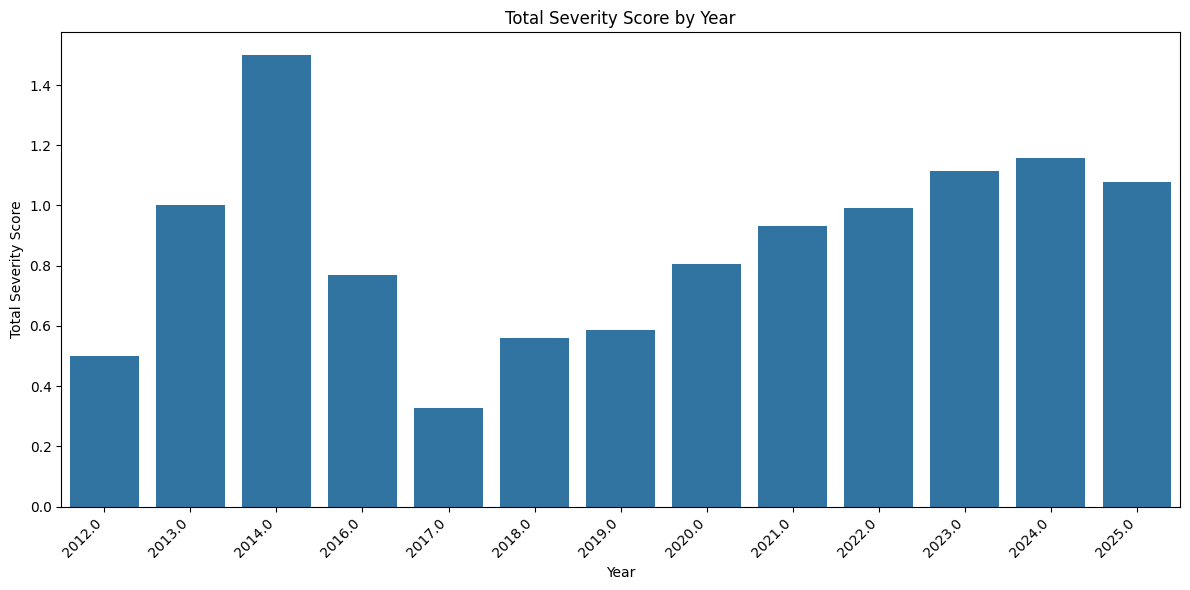

In [ ]:
# Aggregate severity_score by year
severity_by_year = df.groupby('year')['severity_score'].mean().reset_index()

# Sort by year for better visualization
severity_by_year = severity_by_year.sort_values('year')

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='severity_score', data=severity_by_year)
plt.title('Total Severity Score by Year')
plt.xlabel('Year')
plt.ylabel('Total Severity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

similarly lets check it for monthly. on the other note lets leave it for forecasting model, now I will only concentrate on predition model

In [ ]:
# prompt: make it so that i can see all the column in .head()

pd.set_option('display.max_columns', None)
df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday,severity_score
0,2021-09-11,2:39,unknown,unknown,40.72773,-73.921295,unknown,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Aggressive Driving/Road Rage,Unspecified,4455765.0,Sedan,Sedan,injury_only,2021.0,9.0,11.0,5.0,4.0
1,2022-03-26,11:45,unknown,unknown,40.72773,-73.921295,unknown,other,unknown,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Pavement Slippery,unknown,4513547.0,Sedan,unknown,injury_only,2022.0,3.0,26.0,5.0,2.0
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Unspecified,Unspecified,4675373.0,Moped,Sedan,injury_only,2023.0,11.0,1.0,2.0,2.0
3,2022-06-29,6:55,unknown,unknown,40.72773,-73.921295,unknown,THROGS NECK BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Following Too Closely,Unspecified,4541903.0,Sedan,Pick-up Truck,no_casualty,2022.0,6.0,29.0,2.0,0.0
4,2022-09-21,13:21,unknown,unknown,40.72773,-73.921295,unknown,BROOKLYN BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Passing Too Closely,Unspecified,4566131.0,Station Wagon/Sport Utility Vehicle,unknown,no_casualty,2022.0,9.0,21.0,2.0,0.0


Now lets divide features into numerical and categorical

In [ ]:
num_feat = [feat for feat in df.columns if df[feat].dtype != 'O']
cat_feat = [feat for feat in df.columns if feat not in num_feat]

lets remove 'crash date' and 'crash time' from the categorical feature

In [ ]:
cat_feat.remove('crash date')
cat_feat.remove('crash time')

NOw lets check the cardinality for each categorical feature

In [ ]:
for feat in cat_feat:
  print(feat, df[feat].nunique())

borough 6
zip code 188
location 179607
on street name 2445
cross street name 1468
contributing factor vehicle 1 53
contributing factor vehicle 2 40
vehicle type code 1 58
vehicle type code 2 67
severity 2


OKay, now for borough we can simlpy do one hot encoding, but the rest have a lot of unique value.
Since we already have 'latitude' and 'longitude' lets cluster to find neighbor hood  

In [ ]:
from sklearn.cluster import KMeans

coords = df[['latitude', 'longitude']].dropna()  # Drop rows with missing coordinates
kmeans = KMeans(n_clusters=22, random_state=42)  # Adjust n_clusters as needed
df['location_zones'] = kmeans.fit_predict(coords)

In [ ]:
df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday,severity_score,location_zones
0,2021-09-11,2:39,unknown,unknown,40.72773,-73.921295,unknown,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Aggressive Driving/Road Rage,Unspecified,4455765.0,Sedan,Sedan,fatality,2021.0,9.0,11.0,5.0,4.0,7
1,2022-03-26,11:45,unknown,unknown,40.72773,-73.921295,unknown,other,unknown,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Pavement Slippery,unknown,4513547.0,Sedan,unknown,fatality,2022.0,3.0,26.0,5.0,2.0,7
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Unspecified,Unspecified,4675373.0,Moped,Sedan,fatality,2023.0,11.0,1.0,2.0,2.0,6
3,2022-06-29,6:55,unknown,unknown,40.72773,-73.921295,unknown,THROGS NECK BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Following Too Closely,Unspecified,4541903.0,Sedan,Pick-up Truck,no fatality,2022.0,6.0,29.0,2.0,0.0,7
4,2022-09-21,13:21,unknown,unknown,40.72773,-73.921295,unknown,BROOKLYN BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Passing Too Closely,Unspecified,4566131.0,Station Wagon/Sport Utility Vehicle,unknown,no fatality,2022.0,9.0,21.0,2.0,0.0,7


Now I will be assigning rush hour to each id or row

In [ ]:
df['crash_time_parsed'] = pd.to_datetime(df['crash time'], format='%H:%M', errors='coerce').dt.time

def rush_label(t):
    if pd.isna(t): return 'unknown'
    if t >= pd.to_datetime('07:00', format='%H:%M').time() and t < pd.to_datetime('10:00', format='%H:%M').time():
         return 'morning_peak'
    if t >= pd.to_datetime('16:00', format='%H:%M').time() and t < pd.to_datetime('19:00', format='%H:%M').time():
         return 'evening_peak'
    return 'off_peak'
df['rush_hour_label'] = df['crash_time_parsed'].apply(rush_label)

In [ ]:
df.shape

(933761, 31)

In [ ]:
df.shape
num_feat.append('location_zones')
df.shape

(815767, 31)

In [ ]:
# Assume df['crash_time_parsed'] is a datetime.time as before
times = pd.to_datetime(df['crash time'], format='%H:%M', errors='coerce')
df['hour'] = times.dt.hour
# Encode cyclical hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)


In [ ]:
df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday,severity_score,location_zones,crash_time_parsed,rush_hour_label,hour,hour_sin,hour_cos
0,2021-09-11,2:39,unknown,unknown,40.72773,-73.921295,unknown,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Aggressive Driving/Road Rage,Unspecified,4455765.0,Sedan,Sedan,injury_only,2021.0,9.0,11.0,5.0,4.0,16,02:39:00,off_peak,2,0.500000,8.660254e-01
1,2022-03-26,11:45,unknown,unknown,40.72773,-73.921295,unknown,other,unknown,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Pavement Slippery,unknown,4513547.0,Sedan,unknown,injury_only,2022.0,3.0,26.0,5.0,2.0,16,11:45:00,off_peak,11,0.258819,-9.659258e-01
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Unspecified,Unspecified,4675373.0,Moped,Sedan,injury_only,2023.0,11.0,1.0,2.0,2.0,12,01:29:00,off_peak,1,0.258819,9.659258e-01
3,2022-06-29,6:55,unknown,unknown,40.72773,-73.921295,unknown,THROGS NECK BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Following Too Closely,Unspecified,4541903.0,Sedan,Pick-up Truck,no_casualty,2022.0,6.0,29.0,2.0,0.0,16,06:55:00,off_peak,6,1.000000,6.123234e-17
4,2022-09-21,13:21,unknown,unknown,40.72773,-73.921295,unknown,BROOKLYN BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Passing Too Closely,Unspecified,4566131.0,Station Wagon/Sport Utility Vehicle,unknown,no_casualty,2022.0,9.0,21.0,2.0,0.0,16,13:21:00,off_peak,13,-0.258819,-9.659258e-01


In [ ]:
cat_feat

['borough',
 'zip code',
 'location',
 'on street name',
 'cross street name',
 'contributing factor vehicle 1',
 'contributing factor vehicle 2',
 'vehicle type code 1',
 'vehicle type code 2',
 'severity']

In [ ]:

for feat in cat_feat:
  print(feat, df[feat].nunique())

borough 6
zip code 188
location 179607
on street name 2445
cross street name 1468
contributing factor vehicle 1 53
contributing factor vehicle 2 40
vehicle type code 1 58
vehicle type code 2 67
severity 2


In [ ]:
print((df['severity']=='fatality').sum())
print((df['severity']=='no fatality').sum())

245004
570763


In [ ]:
df.columns

Index(['crash date', 'crash time', 'borough', 'zip code', 'latitude',
       'longitude', 'location', 'on street name', 'cross street name',
       'number of persons injured', 'number of persons killed',
       'number of pedestrians injured', 'number of pedestrians killed',
       'number of cyclist injured', 'number of cyclist killed',
       'number of motorist injured', 'number of motorist killed',
       'contributing factor vehicle 1', 'contributing factor vehicle 2',
       'collision_id', 'vehicle type code 1', 'vehicle type code 2',
       'severity', 'year', 'month', 'day', 'weekday', 'severity_score',
       'location_zones', 'crash_time_parsed', 'rush_hour_label', 'hour',
       'hour_sin', 'hour_cos'],
      dtype='object')

In [ ]:
features = [feat for feat in df.columns if feat not in ['location','severity','crash date','crash time','crash_time_parsed','number of persons injured',
 'number of persons killed',
 'number of pedestrians injured',
 'number of pedestrians killed',
 'number of cyclist injured',
 'number of cyclist killed',
 'number of motorist injured',
 'number of motorist killed','severity_score']]

In [ ]:
df.head(

)

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday,severity_score,location_zones,crash_time_parsed,rush_hour_label,hour,hour_sin,hour_cos
0,2021-09-11,2:39,unknown,unknown,40.72773,-73.921295,unknown,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Aggressive Driving/Road Rage,Unspecified,4455765.0,Sedan,Sedan,fatality,2021.0,9.0,11.0,5.0,4.0,7,02:39:00,off_peak,2,0.500000,8.660254e-01
1,2022-03-26,11:45,unknown,unknown,40.72773,-73.921295,unknown,other,unknown,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Pavement Slippery,unknown,4513547.0,Sedan,unknown,fatality,2022.0,3.0,26.0,5.0,2.0,7,11:45:00,off_peak,11,0.258819,-9.659258e-01
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Unspecified,Unspecified,4675373.0,Moped,Sedan,fatality,2023.0,11.0,1.0,2.0,2.0,6,01:29:00,off_peak,1,0.258819,9.659258e-01
3,2022-06-29,6:55,unknown,unknown,40.72773,-73.921295,unknown,THROGS NECK BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Following Too Closely,Unspecified,4541903.0,Sedan,Pick-up Truck,no fatality,2022.0,6.0,29.0,2.0,0.0,7,06:55:00,off_peak,6,1.000000,6.123234e-17
4,2022-09-21,13:21,unknown,unknown,40.72773,-73.921295,unknown,BROOKLYN BRIDGE,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Passing Too Closely,Unspecified,4566131.0,Station Wagon/Sport Utility Vehicle,unknown,no fatality,2022.0,9.0,21.0,2.0,0.0,7,13:21:00,off_peak,13,-0.258819,-9.659258e-01


In [ ]:
features

['borough',
 'zip code',
 'latitude',
 'longitude',
 'on street name',
 'cross street name',
 'contributing factor vehicle 1',
 'contributing factor vehicle 2',
 'collision_id',
 'vehicle type code 1',
 'vehicle type code 2',
 'year',
 'month',
 'day',
 'weekday',
 'location_zones',
 'rush_hour_label',
 'hour',
 'hour_sin',
 'hour_cos']

In [ ]:
# Convert severity into binary target
df['severity_binary'] = df['severity'].map({'no fatality': 0, 'fatality': 1})


In [ ]:
df.shape

(815767, 35)

In [ ]:
# prompt: generate a code to save my df file in drive

from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/drive/My Drive/processed_df.csv', index=False)

print("DataFrame saved successfully to Google Drive!")


Mounted at /content/drive
DataFrame saved successfully to Google Drive!


now lets divide data to train, validation and test

In [ ]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['severity_binary']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
X_train.shape

(571036, 20)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

low_card_cols = ['rush_hour_label', 'borough']
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit only on train
onehot.fit(X_train[low_card_cols])

X_train_oh = pd.DataFrame(onehot.transform(X_train[low_card_cols]), columns=onehot.get_feature_names_out())
X_val_oh = pd.DataFrame(onehot.transform(X_val[low_card_cols]), columns=onehot.get_feature_names_out())
X_test_oh = pd.DataFrame(onehot.transform(X_test[low_card_cols]), columns=onehot.get_feature_names_out())

X_train_oh.index = X_train.index
X_val_oh.index = X_val.index
X_test_oh.index = X_test.index


In [ ]:
med_card_cols = [
    'contributing factor vehicle 1', 'contributing factor vehicle 2',
    'vehicle type code 1', 'vehicle type code 2', 'zip code'
]

X_train_te = pd.DataFrame(index=X_train.index)
X_val_te = pd.DataFrame(index=X_val.index)
X_test_te = pd.DataFrame(index=X_test.index)

for col in med_card_cols:
    # Compute means from train
    means = X_train[[col]].join(y_train).groupby(col)['severity_binary'].mean()

    # Map means
    X_train_te[col + '_te'] = X_train[col].map(means).fillna(0)
    X_val_te[col + '_te'] = X_val[col].map(means).fillna(0)
    X_test_te[col + '_te'] = X_test[col].map(means).fillna(0)


In [ ]:
from sklearn.feature_extraction import FeatureHasher
high_card_cols = ['on street name', 'cross street name']

def hash_encode(X, cols, n_features=32):
    fh = FeatureHasher(n_features=n_features, input_type='string')

    # Each row must be a list of strings, not a single string
    input_data = X[cols].astype(str).values.tolist()  # This gives list of lists of strings

    hashed = fh.transform(input_data)
    return pd.DataFrame(hashed.toarray(), index=X.index, columns=[f'hash_{i}' for i in range(n_features)])
X_train_hash = hash_encode(X_train, high_card_cols)
X_val_hash = hash_encode(X_val, high_card_cols)
X_test_hash = hash_encode(X_test, high_card_cols)


In [ ]:
# Combine all three sets along the column axis
X_train_final = pd.concat([X_train_oh, X_train_te, X_train_hash], axis=1)
X_val_final   = pd.concat([X_val_oh, X_val_te, X_val_hash], axis=1)
X_test_final  = pd.concat([X_test_oh, X_test_te, X_test_hash], axis=1)


In [ ]:
# prompt: I wish to know how many in y_train are 1 and 0

print("Count of 1s in y_train:", (y_train == 1).sum())
print("Count of 0s in y_train:", (y_train == 0).sum())

Count of 1s in y_train: 171503
Count of 0s in y_train: 399533


Now I will train models without balancing the train data

In [ ]:
print(X_train_final.shape, X_val_final.shape, X_test_final.shape)


(571036, 46) (122365, 46) (122366, 46)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2. Load the compressed data
import numpy as np

# Using your exact path
data_path = '/content/drive/MyDrive/MyData/tomek_data.npz'

# Method 1: Standard load
data = np.load(data_path)
X_tomek = data['X_tomek']
y_tomek = data['y_tomek']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(f"X_tomek shape: {X_tomek.shape}")
print(f"y_tomek distribution: {dict(zip(*np.unique(y_tomek, return_counts=True)))}")

X_tomek shape: (694111, 46)
y_tomek distribution: {np.int64(0): np.int64(332017), np.int64(1): np.int64(362094)}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train_final, y_train)

#------------------------------#
# Step 6: Evaluate Model       #
#------------------------------#
y_val_pred = rf_model.predict(X_val_final)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = rf_model.predict(X_test_final)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Report:\n", classification_report(y_test, y_test_pred))

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_val_final)
    score = f1_score(y_val, y_pred, pos_label=1)

    print(f"Trial {trial.number}: F1 Score = {score:.4f} | Params = {params}")

    return score
def log_callback(study, trial):
    print(f"[{trial.number}] Best F1: {study.best_value:.4f} with params: {study.best_params}")


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True, callbacks=[log_callback])  # Try 30 trials (increase for better tuning)

print("Best Trial:")
print(study.best_trial)

best_params = study.best_params
best_params['random_state'] = 42
best_params['n_jobs'] = -1

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_final, y_train)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score

y_val_pred = best_model.predict(X_val_final)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

y_test_pred = best_model.predict(X_test_final)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


these are the best param 0.6295 with params: {'n_estimators': 446, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': None, 'class_weight': 'balanced_subsample'}

Validation Accuracy: 0.6961240310077519
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      3328
           1       0.56      0.73      0.63      1832

    accuracy                           0.70      5160
   macro avg       0.69      0.70      0.69      5160
weighted avg       0.73      0.70      0.70      5160

Test Accuracy: 0.689922480620155
              precision    recall  f1-score   support

           0       0.81      0.67      0.74      3328
           1       0.55      0.72      0.62      1832

    accuracy                           0.69      5160
   macro avg       0.68      0.70      0.68      5160
weighted avg       0.72      0.69      0.70      5160


In [ ]:
import xgboost as xgb
import optuna
from sklearn.metrics import f1_score, accuracy_score, classification_report
import numpy as np

# Calculate scale_pos_weight for class imbalance
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 7, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric': 'logloss'
    }

    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train_final, y_train,
        eval_set=[(X_val_final, y_val)],
        verbose=False
    )
    y_pred = model.predict(X_val_final)
    score = f1_score(y_val, y_pred, pos_label=1)

    print(f"Trial {trial.number}: F1 Score = {score:.4f} | Params = {params}")
    return score

# Callback to log progress
def log_callback(study, trial):
    print(f"[{trial.number}] Best F1: {study.best_value:.4f} with params: {study.best_params}")

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True, callbacks=[log_callback])

# Train best model found by Optuna
best_params = study.best_params
best_params.update({
    'random_state': 42,
    'n_jobs': -1,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'scale_pos_weight': scale_pos_weight
})

best_model = xgb.XGBClassifier(**best_params)
best_model.fit(
    X_train_final, y_train,
    eval_set=[(X_val_final, y_val)],
    verbose=True
)

# Evaluate on validation set
print("\nValidation Set:")
y_val_pred = best_model.predict(X_val_final)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
print("\nTest Set:")
y_test_pred = best_model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


OKay Now this was done on imbalanced data set, Now lets use smote and random undersampling to increase minority class i.e, 1s to 17000 and reduce majority class to 19000, to reduce training time and balance the data

In [ ]:
# lets try without any oversampling and lets do undersampling for majority class and also use smote_tek to clean
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from collections import Counter


undersample = RandomUnderSampler(sampling_strategy={0: 375000}, random_state=42)
X_train_us, y_train_us=undersample.fit_resample(X_train_final, y_train)

# Step 1: Remove ambiguous majority points using Tomek Links
tomek = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tomek.fit_resample(X_train_us, y_train_us)

print("After TomekLinks:", Counter(y_tomek))









After TomekLinks: Counter({0: 347740, 1: 171503})


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Step 1: Undersample class 0 to 19000
under = RandomUnderSampler(sampling_strategy={0: 250000}, random_state=42)

# Step 2: Oversample class 1 to 17000 using SMOTE
smote = SMOTE(sampling_strategy={1: 220000}, random_state=42, k_neighbors=3) # to reduce the noise lets decrease the nearest neigbors to 3

# Create pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('under', under),
])

X_resampled, y_resampled = pipeline.fit_resample(X_train_final, y_train)

print("After resampling:", y_resampled.value_counts())


After resampling: severity_binary
0    250000
1    220000
Name: count, dtype: int64


In [ ]:
import xgboost as xgb
import optuna
from sklearn.metrics import f1_score, accuracy_score, classification_report,recall_score
import numpy as np

# Calculate scale_pos_weight for class imbalance


# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 700),
        'max_depth': trial.suggest_int('max_depth', 7, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 7),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 3.0), # tuning even penalizing weight
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric': 'logloss'
    }

    model = xgb.XGBClassifier(**params)
    model.fit(
        X_resampled, y_resampled,
        eval_set=[(X_val_final, y_val)],
        verbose=False
    )
    y_pred = model.predict(X_val_final)
    score = recall_score(y_val, y_pred, pos_label=1)


    print(f"Trial {trial.number}: recall_score = {score:.4f} | Params = {params}")
    return score

# Callback to log progress
def log_callback(study, trial):
    print(f"[{trial.number}] Best recall: {study.best_value:.4f} with params: {study.best_params}")

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40, show_progress_bar=True, callbacks=[log_callback])

# Train best model found by Optuna
best_params = study.best_params
best_params.update({
    'random_state': 42,
    'n_jobs': -1,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
})

best_model = xgb.XGBClassifier(**best_params)
best_model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_val_final, y_val)],
    verbose=True
)

# Evaluate on validation set
print("\nValidation Set:")
y_val_pred = best_model.predict(X_val_final)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
print("\nTest Set:")
y_test_pred = best_model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[I 2025-06-14 10:38:16,996] A new study created in memory with name: no-name-ab488668-3c16-4004-a485-5794146d516f


  0%|          | 0/40 [00:00<?, ?it/s]

Trial 0: recall_score = 0.5887 | Params = {'n_estimators': 624, 'max_depth': 14, 'learning_rate': 0.23430859060786527, 'subsample': 0.9794571907327774, 'colsample_bytree': 0.5985443098968386, 'gamma': 2.9136328281966706, 'reg_alpha': 6.830442873198131, 'reg_lambda': 2.0711828446077933, 'scale_pos_weight': 1.1596905236602666, 'random_state': 42, 'n_jobs': -1, 'eval_metric': 'logloss'}
[I 2025-06-14 10:39:13,229] Trial 0 finished with value: 0.5887346938775511 and parameters: {'n_estimators': 624, 'max_depth': 14, 'learning_rate': 0.23430859060786527, 'subsample': 0.9794571907327774, 'colsample_bytree': 0.5985443098968386, 'gamma': 2.9136328281966706, 'reg_alpha': 6.830442873198131, 'reg_lambda': 2.0711828446077933, 'scale_pos_weight': 1.1596905236602666}. Best is trial 0 with value: 0.5887346938775511.
[0] Best recall: 0.5887 with params: {'n_estimators': 624, 'max_depth': 14, 'learning_rate': 0.23430859060786527, 'subsample': 0.9794571907327774, 'colsample_bytree': 0.5985443098968386, 

NameError: name 'scale_pos_weight' is not defined

OKay lets renove the scale_pos_weight param and run it

In [ ]:
# Train best model found by Optuna
best_params = study.best_params
best_params.update({
    'random_state': 42,
    'n_jobs': -1,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
})

best_model = xgb.XGBClassifier(**best_params)
best_model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_val_final, y_val)],
    verbose=True
)

# Evaluate on validation set
print("\nValidation Set:")
y_val_pred = best_model.predict(X_val_final)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
print("\nTest Set:")
y_test_pred = best_model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:06:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.93545
[1]	validation_0-logloss:0.93289
[2]	validation_0-logloss:0.93000
[3]	validation_0-logloss:0.92693
[4]	validation_0-logloss:0.92333
[5]	validation_0-logloss:0.92001
[6]	validation_0-logloss:0.91899
[7]	validation_0-logloss:0.91740
[8]	validation_0-logloss:0.91622
[9]	validation_0-logloss:0.91586
[10]	validation_0-logloss:0.91349
[11]	validation_0-logloss:0.91125
[12]	validation_0-logloss:0.90876
[13]	validation_0-logloss:0.90772
[14]	validation_0-logloss:0.90532
[15]	validation_0-logloss:0.90458
[16]	validation_0-logloss:0.90241
[17]	validation_0-logloss:0.90051
[18]	validation_0-logloss:0.89752
[19]	validation_0-logloss:0.89472
[20]	validation_0-logloss:0.89265
[21]	validation_0-logloss:0.89097
[22]	validation_0-logloss:0.88913
[23]	validation_0-logloss:0.88715
[24]	validation_0-logloss:0.88625
[25]	validation_0-logloss:0.88429
[26]	validation_0-logloss:0.88278
[27]	validation_0-logloss:0.88094
[28]	validation_0-logloss:0.87876
[29]	validation_0-loglos

In [ ]:
recall_model = best_model
from google.colab import drive
drive.mount('/content/drive')

# Save the trained model (with all learned weights)
model_path = '/content/drive/MyDrive/recall_model.json'
recall_model.save_model(model_path)  # XGBoost native format

Mounted at /content/drive


{'n_estimators': 304, 'max_depth': 13, 'learning_rate': 0.06987459623239146, 'subsample': 0.9739448450173773, 'colsample_bytree': 0.5267705388480636, 'gamma': 0.9902350020444318, 'reg_alpha': 2.1667602357632214, 'reg_lambda': 1.7239856655782082, 'scale_pos_weight': 1.6624426347440375}

Validation Set:
Accuracy: 0.6477955382116322
              precision    recall  f1-score   support

           0       0.86      0.57      0.69     71005
           1       0.47      0.81      0.59     33034

    accuracy                           0.65    104039
   macro avg       0.67      0.69      0.64    104039
weighted avg       0.74      0.65      0.66    104039


Test Set:
Accuracy: 0.6447039600153787
              precision    recall  f1-score   support

           0       0.86      0.57      0.69     71006
           1       0.47      0.80      0.59     33034

    accuracy                           0.64    104040
   macro avg       0.66      0.69      0.64    104040
weighted avg       0.74      0.64      0.66    104040

In [ ]:
np.savez_compressed(os.path.join(save_path, 'tomek_data.npz'),
                   X_tomek=X_tomek,
                   y_tomek=y_tomek)

Now lets try lightgbm

In [ ]:
import lightgbm as lgb
import optuna
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, classification_report
from collections import Counter

# 0. Your prepped data:
#    X_tomek, y_tomek
#    X_val_final, y_val
#    X_test_final, y_test

# 1. Objective: maximize precision
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'random_state': 42,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 3.0),
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(
        X_resampled, y_resampled,
        eval_set=[(X_val_final, y_val)]
    )

    y_pred = model.predict(X_val_final)
    prec = precision_score(y_val, y_pred, pos_label=1)
    trial.report(prec, step=0)
    return prec

# 2. Enhanced logging callback
def log_callback(study, trial):
    # trial.value is the precision just returned
    current_prec = trial.value
    # study.best_value is the best precision up to this point
    best_prec = study.best_value
    best_params = study.best_params
    print(f"[Trial {trial.number}] "
          f"current_precision = {current_prec:.4f} | "
          f"best_precision = {best_prec:.4f} | "
          f"best_params = {best_params}")

# 3. Run Optuna with progress bar + per-trial logging
study = optuna.create_study(direction='maximize')
study.optimize(
    objective,
    n_trials=40,
    show_progress_bar=True,
    callbacks=[log_callback]
)

# 4. Summarize best
print(f"\n>> Best precision: {study.best_value:.4f}")
print(">> Best parameters:")
for k, v in study.best_params.items():
    print(f"   {k}: {v}")

# 5. Refit final model
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'random_state': 42,
})
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_val_final, y_val)]

)

# 6. Final evaluation
print("\nValidation Set:")
y_val_pred = best_model.predict(X_val_final)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("\nTest Set:")
y_test_pred = best_model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[I 2025-06-14 11:12:58,191] A new study created in memory with name: no-name-defd162a-5ac4-4657-8335-44bef0348e05


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-06-14 11:13:23,309] Trial 0 finished with value: 0.6374287413003182 and parameters: {'learning_rate': 0.013806333461024913, 'n_estimators': 459, 'num_leaves': 39, 'max_depth': 6, 'min_child_samples': 48, 'subsample': 0.8468229861401555, 'colsample_bytree': 0.9394276215302535, 'reg_alpha': 0.04228041485071221, 'reg_lambda': 3.872102923479592, 'scale_pos_weight': 1.030515266262252}. Best is trial 0 with value: 0.6374287413003182.
[Trial 0] current_precision = 0.6374 | best_precision = 0.6374 | best_params = {'learning_rate': 0.013806333461024913, 'n_estimators': 459, 'num_leaves': 39, 'max_depth': 6, 'min_child_samples': 48, 'subsample': 0.8468229861401555, 'colsample_bytree': 0.9394276215302535, 'reg_alpha': 0.04228041485071221, 'reg_lambda': 3.872102923479592, 'scale_pos_weight': 1.030515266262252}
[I 2025-06-14 11:14:23,478] Trial 1 finished with value: 0.3892806933971581 and parameters: {'learning_rate': 0.02489893645866121, 'n_estimators': 897, 'num_leaves': 81, 'max_depth':

In [ ]:
from google.colab import drive
import lightgbm as lgb

# Mount Google Drive
drive.mount('/content/drive')

# Assuming you've already trained a model:
# best_model = lgb.LGBMClassifier(**params)
# best_model.fit(X_train, y_train)

# Save the model (3 formats available)
best_model.booster_.save_model(
    '/content/drive/MyDrive/lgbm_prec_model.txt'  # .txt or .json
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from google.colab import drive

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Check if file exists
model_path = '/content/drive/MyDrive/lgbm_prec_model.txt'
if not os.path.exists(model_path):
    print("Error: File not found at:", model_path)
    print("Available files in MyDrive:")
    !ls "/content/drive/MyDrive"
else:
    print("Model file found!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model file found!


In [ ]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/lgbm_model.joblib')

['/content/drive/MyDrive/lgbm_model.joblib']

In [ ]:
prec_model = joblib.load('/content/drive/MyDrive/lgbm_model.joblib')
# Everything preserved - predict immediately
y_train_pred = prec_model.predict(X_train_final)
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


Accuracy: 0.7681126934203798
              precision    recall  f1-score   support

           0       0.80      0.88      0.84    399533
           1       0.65      0.50      0.56    171503

    accuracy                           0.77    571036
   macro avg       0.73      0.69      0.70    571036
weighted avg       0.76      0.77      0.76    571036



In [ ]:
recall_model = xgb.XGBClassifier()
recall_model.load_model('/content/drive/MyDrive/recall_model.json')  # Path to your JSON

# Predict (no need to specify classes/features)
y_pred = recall_model.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.14      0.25     85615
           1       0.33      0.98      0.49     36751

    accuracy                           0.39    122366
   macro avg       0.64      0.56      0.37    122366
weighted avg       0.76      0.39      0.32    122366



Lets try to combine these both models and add a logistic regression on the combined models and try to predict

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# assume recall_model and prec_model are already .fit(...) on X_train, y_train

stack = StackingClassifier(
    estimators=[
        ('recall', recall_model),
        ('precision', prec_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 1.9}),
    cv=2,               # do NOT refit the base models
    stack_method='predict_proba',
    passthrough=False
)

# Now fit only the meta-learner:
stack.fit(X_train_final, y_train)

# Predict & evaluate as usual:
y_val_pred = stack.predict(X_val_final)
print("\n Accuracy of validation set")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

y_test_pred = stack.predict(X_test_final)
print("\n Accuracy of test set")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))



 Accuracy of validation set
Accuracy: 0.7686429943202713
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     85615
           1       0.65      0.50      0.56     36750

    accuracy                           0.77    122365
   macro avg       0.73      0.69      0.70    122365
weighted avg       0.76      0.77      0.76    122365


 Accuracy of test set
Accuracy: 0.7696010329666737
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     85615
           1       0.65      0.50      0.57     36751

    accuracy                           0.77    122366
   macro avg       0.73      0.69      0.70    122366
weighted avg       0.76      0.77      0.76    122366



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, f1_score

# 1) Get the stacked probabilities
probs = stack.predict_proba(X_val_final)[:, 1]

# 2) Compute PR curve
precisions, recalls, thresholds = precision_recall_curve(y_val, probs)

# 3) Define your constraints
target_recall_1 = 0.65   # e.g. you want ≥65% recall on fatalities
min_precision_1 = 0.30   # e.g. at least 30% precision on fatalities
min_recall_0    = 0.50   # e.g. at least 50% recall on safe spots

# 4) Find all thresholds meeting the constraints
candidates = []
for p, r, t in zip(precisions, recalls, np.append(thresholds, 1.0)):
    r0 = recall_score(y_val, probs >= t, pos_label=0)
    if (r >= target_recall_1) and (p >= min_precision_1) and (r0 >= min_recall_0):
        candidates.append((t, p, r, r0, f1_score(y_val, probs >= t)))

# 5) Pick the candidate with the highest F1 (or any other criterion)
if not candidates:
    print("No threshold meets all constraints—relax a constraint.")
else:
    best = max(candidates, key=lambda x: x[4])  # maximize F1
    best_thresh, best_p, best_r1, best_r0, best_f1 = best
    print(f"Selected threshold = {best_thresh:.3f}")
    print(f" precision_1={best_p:.3f}, recall_1={best_r1:.3f}, recall_0={best_r0:.3f}, F1={best_f1:.3f}")

    # 6) Apply it
    y_val_pred = (probs >= best_thresh).astype(int)
    print("\nFinal classification report:")
    print(classification_report(y_val, y_val_pred))


Selected threshold = 0.405
 precision_1=0.526, recall_1=0.658, recall_0=0.745, F1=0.584

Final classification report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     85615
           1       0.53      0.66      0.58     36750

    accuracy                           0.72    122365
   macro avg       0.68      0.70      0.69    122365
weighted avg       0.74      0.72      0.73    122365



In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, recall_score, classification_report

# Assume recall_model and prec_model are pre-trained and fixed,
# and X_train_final, y_train, X_val_final, y_val are ready.

def build_stack(seed):
    """Create a StackingClassifier with a LogisticRegression(meta) using a given seed."""
    return StackingClassifier(
        estimators=[
            ('recall', recall_model),
            ('precision', prec_model)
        ],
        final_estimator=LogisticRegression(
            C=1.0,                 # or your tuned C
            class_weight={0:1,1:1.7},# or your tuned weights
            solver='lbfgs',
            max_iter=1000,
            random_state=seed
        ),
        cv='prefit',             # do not retrain base models
        stack_method='predict_proba',
        passthrough=False
    )

# 1) Train multiple stacks with different seeds
n_models = 5
seeds = [0, 7, 13, 42, 99]
stacks = []
for s in seeds[:n_models]:
    stk = build_stack(s)
    stk.fit(X_train_final, y_train)
    stacks.append(stk)

# 2) Predict and average probabilities on validation set
proba_val = np.zeros((len(X_val_final),))
for stk in stacks:
    proba_val += stk.predict_proba(X_val_final)[:,1]
proba_val /= len(stacks)  # averaged probability

# 3) Choose a threshold (e.g. your previously found ~0.372)
threshold = 0.372
y_val_pred = (proba_val >= threshold).astype(int)

print("Ensemble Validation Report @ thresh =", threshold)
print(classification_report(y_val, y_val_pred))

# 4) Repeat on test set
proba_test = np.zeros((len(X_test_final),))
for stk in stacks:
    proba_test += stk.predict_proba(X_test_final)[:,1]
proba_test /= len(stacks)

y_test_pred = (proba_test >= threshold).astype(int)
print("\nEnsemble Test Report @ thresh =", threshold)
print(classification_report(y_test, y_test_pred))


Ensemble Validation Report @ thresh = 0.372
              precision    recall  f1-score   support

           0       0.85      0.63      0.73     85615
           1       0.47      0.74      0.57     36750

    accuracy                           0.67    122365
   macro avg       0.66      0.69      0.65    122365
weighted avg       0.74      0.67      0.68    122365


Ensemble Test Report @ thresh = 0.372
              precision    recall  f1-score   support

           0       0.85      0.63      0.73     85615
           1       0.46      0.74      0.57     36751

    accuracy                           0.67    122366
   macro avg       0.66      0.69      0.65    122366
weighted avg       0.73      0.67      0.68    122366



In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report

# assume recall_model and prec_model are pre-trained and fixed,
# and you have X_train_final, y_train, X_val_final, y_val defined

def objective(trial):
    # Suggest hyperparameters for the meta‐learner
    C = trial.suggest_loguniform("C", 1e-3, 1e2)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    cw = trial.suggest_categorical("class_weight", [
        {0: 1, 1: 1},
        {0: 1, 1: 1.5},
        {0: 1, 1: 2},
        "balanced"
    ])

    # Build the stacking classifier with prefit base models
    stack = StackingClassifier(
        estimators=[
            ("recall", recall_model),
            ("precision", prec_model)
        ],
        final_estimator=LogisticRegression(
            C=C,
            penalty=penalty,
            class_weight=cw,
            solver="saga",
            max_iter=5000,
            random_state=42
        ),
        cv="prefit",
        stack_method="predict_proba",
        passthrough=False
    )

    # Fit only the meta‐learner
    stack.fit(X_train_final, y_train)

    # Evaluate recall on the hold‐out validation set
    y_pred = stack.predict(X_val_final)
    return recall_score(y_val, y_pred, pos_label=1)

# Create and run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best recall:", study.best_value)
print("Best meta-learner params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# Rebuild and fit final stacked model with best params
best_params = study.best_params
final_stack = StackingClassifier(
    estimators=[
        ("recall", recall_model),
        ("precision", prec_model)
    ],
    final_estimator=LogisticRegression(
        C=best_params["C"],
        penalty=best_params["penalty"],
        class_weight=best_params["class_weight"],
        solver="saga",
        max_iter=5000,
        random_state=42
    ),
    cv="prefit",
    stack_method="predict_proba",
    passthrough=False
)
final_stack.fit(X_train_final, y_train)

# Evaluate on validation and test
for name, X_, y_ in [
    ("Validation", X_val_final, y_val),
    ("Test", X_test_final, y_test)
]:
    y_pred = final_stack.predict(X_)
    print(f"\n{name} set report:")
    print(classification_report(y_, y_pred))


[I 2025-06-14 13:08:50,211] A new study created in memory with name: no-name-67fe6d66-367e-4b52-8269-fa87c1dd4804


  0%|          | 0/30 [00:00<?, ?it/s]

<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:09:15,823] Trial 0 finished with value: 0.4641904761904762 and parameters: {'C': 0.04490865489229507, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 0 with value: 0.4641904761904762.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:09:40,825] Trial 1 finished with value: 0.4101496598639456 and parameters: {'C': 4.149336569278777, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 0 with value: 0.4641904761904762.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:10:05,777] Trial 2 finished with value: 0.616108843537415 and parameters: {'C': 0.2079687650214644, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:10:31,269] Trial 3 finished with value: 0.41006802721088437 and parameters: {'C': 0.1614419270383971, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:10:57,544] Trial 4 finished with value: 0.5403809523809524 and parameters: {'C': 0.005975842590605067, 'penalty': 'l1', 'class_weight': {0: 1, 1: 2}}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:11:23,055] Trial 5 finished with value: 0.4101496598639456 and parameters: {'C': 7.548843007999087, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:11:48,034] Trial 6 finished with value: 0.4640272108843537 and parameters: {'C': 22.486941752361023, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:12:13,559] Trial 7 finished with value: 0.464 and parameters: {'C': 2.0166657015686624, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:12:37,076] Trial 8 finished with value: 0.41006802721088437 and parameters: {'C': 0.17475135162370584, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:13:00,973] Trial 9 finished with value: 0.4098775510204082 and parameters: {'C': 0.12398319907164256, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 2 with value: 0.616108843537415.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:13:26,191] Trial 10 finished with value: 0.6223945578231292 and parameters: {'C': 0.004156723680683258, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:13:51,206] Trial 11 finished with value: 0.6185850340136054 and parameters: {'C': 0.0011370323370150845, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:14:16,922] Trial 12 finished with value: 0.6183673469387755 and parameters: {'C': 0.0010911172729829077, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:14:41,922] Trial 13 finished with value: 0.6187210884353741 and parameters: {'C': 0.0011635178711011562, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:15:07,254] Trial 14 finished with value: 0.6211156462585034 and parameters: {'C': 0.011177615336841962, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:15:32,255] Trial 15 finished with value: 0.6210884353741497 and parameters: {'C': 0.011462707772653798, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:15:57,534] Trial 16 finished with value: 0.5444353741496598 and parameters: {'C': 0.015355534419333712, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:16:22,998] Trial 17 finished with value: 0.6158911564625851 and parameters: {'C': 0.8322464660473474, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:16:48,298] Trial 18 finished with value: 0.6119455782312925 and parameters: {'C': 0.004372323023543918, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:17:13,705] Trial 19 finished with value: 0.6182040816326531 and parameters: {'C': 0.03444826730537424, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:17:39,718] Trial 20 finished with value: 0.5429659863945578 and parameters: {'C': 66.40603894465069, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:18:05,761] Trial 21 finished with value: 0.6219591836734694 and parameters: {'C': 0.0070645478186047795, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:18:31,089] Trial 22 finished with value: 0.6216598639455783 and parameters: {'C': 0.0037225422136772253, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:18:56,004] Trial 23 finished with value: 0.6213877551020408 and parameters: {'C': 0.0031528662361185946, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:19:21,472] Trial 24 finished with value: 0.6180136054421769 and parameters: {'C': 0.03649156669671775, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:19:46,466] Trial 25 finished with value: 0.6213333333333333 and parameters: {'C': 0.0030848373586086926, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:20:12,469] Trial 26 finished with value: 0.6158911564625851 and parameters: {'C': 0.6389325587508302, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:20:37,552] Trial 27 finished with value: 0.6169251700680272 and parameters: {'C': 0.0665535797646863, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:21:02,333] Trial 28 finished with value: 0.5443809523809524 and parameters: {'C': 0.018989757315961683, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 10 with value: 0.6223945578231292.


<ipython-input-71-2074479749>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:21:27,021] Trial 29 finished with value: 0.4605442176870748 and parameters: {'C': 0.002372428174252247, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 10 with value: 0.6223945578231292.
Best recall: 0.6223945578231292
Best meta-learner params:
  C: 0.004156723680683258
  penalty: l2
  class_weight: balanced

Validation set report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     85615
           1       0.53      0.62      0.58     36750

    accuracy                           0.72    122365
   macro avg       0.68      0.69      0.69    122365
weighted avg       0.74      0.72      0.73    122365


Test set report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     85615
           1       0.53      0.62      0.58     36751

    accuracy                           0.72    122366
   macro avg       0.68      0.69      0.69    122366
weighted avg    

In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, f1_score

# assume recall_model and prec_model are pre-trained and fixed,
# and you have X_train_final, y_train, X_val_final, y_val defined

def objective(trial):
    # Suggest hyperparameters for the meta‐learner
    C = trial.suggest_loguniform("C", 1e-3, 1e2)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    cw = trial.suggest_categorical("class_weight", [
        {0: 1, 1: 1},
        {0: 1, 1: 1.5},
        {0: 1, 1: 2},
        "balanced"
    ])

    # Build the stacking classifier with prefit base models
    stack = StackingClassifier(
        estimators=[
            ("recall", recall_model),
            ("precision", prec_model)
        ],
        final_estimator=LogisticRegression(
            C=C,
            penalty=penalty,
            class_weight=cw,
            solver="saga",
            max_iter=5000,
            random_state=42
        ),
        cv="prefit",
        stack_method="predict_proba",
        passthrough=False
    )

    # Fit only the meta‐learner
    stack.fit(X_resampled, y_resampled)

    # Evaluate recall on the hold‐out validation set
    y_pred = stack.predict(X_val_final)
    return f1_score(y_val, y_pred, pos_label=1)

# Create and run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("Best f1:", study.best_value)
print("Best meta-learner params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# Rebuild and fit final stacked model with best params
best_params = study.best_params
final_stack = StackingClassifier(
    estimators=[
        ("recall", recall_model),
        ("precision", prec_model)
    ],
    final_estimator=LogisticRegression(
        C=best_params["C"],
        penalty=best_params["penalty"],
        class_weight=best_params["class_weight"],
        solver="saga",
        max_iter=5000,
        random_state=42
    ),
    cv="prefit",
    stack_method="predict_proba",
    passthrough=False
)
final_stack.fit(X_train_final, y_train)

# Evaluate on validation and test
for name, X_, y_ in [
    ("Validation", X_val_final, y_val),
    ("Test", X_test_final, y_test)
]:
    y_pred = final_stack.predict(X_)
    print(f"\n{name} set report:")
    print(classification_report(y_, y_pred))


[I 2025-06-14 13:32:20,513] A new study created in memory with name: no-name-1fc5863d-8d44-4fc0-b387-b79b1d778ca9


  0%|          | 0/40 [00:00<?, ?it/s]

<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:32:45,657] Trial 0 finished with value: 0.5656209897243272 and parameters: {'C': 0.007215082498896654, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 0 with value: 0.5656209897243272.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:33:08,044] Trial 1 finished with value: 0.5699521154845323 and parameters: {'C': 0.1305705186449724, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.5699521154845323.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:33:28,182] Trial 2 finished with value: 0.5643746841463777 and parameters: {'C': 0.1052118863325578, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 1 with value: 0.5699521154845323.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:33:49,709] Trial 3 finished with value: 0.5762386422081262 and parameters: {'C': 0.20250375299299778, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:34:12,210] Trial 4 finished with value: 0.5700438300741739 and parameters: {'C': 1.3296117943065522, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:34:32,697] Trial 5 finished with value: 0.5746264613784361 and parameters: {'C': 0.007828688995830287, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:34:52,717] Trial 6 finished with value: 0.5658506352649519 and parameters: {'C': 0.0019540339991732086, 'penalty': 'l1', 'class_weight': {0: 1, 1: 2}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:35:15,253] Trial 7 finished with value: 0.5677226527699278 and parameters: {'C': 1.151547009515573, 'penalty': 'l1', 'class_weight': {0: 1, 1: 2}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:35:36,384] Trial 8 finished with value: 0.5640284769592804 and parameters: {'C': 0.3897128852651069, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:35:57,505] Trial 9 finished with value: 0.5676739619750012 and parameters: {'C': 3.556813258589931, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:36:20,671] Trial 10 finished with value: 0.5762106468231254 and parameters: {'C': 41.86929781735792, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:36:41,740] Trial 11 finished with value: 0.5762106468231254 and parameters: {'C': 72.48562127899375, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:37:03,605] Trial 12 finished with value: 0.5762106468231254 and parameters: {'C': 53.68783206390351, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:37:25,379] Trial 13 finished with value: 0.5762106468231254 and parameters: {'C': 8.99642651695129, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:37:47,073] Trial 14 finished with value: 0.5762027050162644 and parameters: {'C': 0.0630727950820837, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:38:08,920] Trial 15 finished with value: 0.5762106468231254 and parameters: {'C': 9.179192267978948, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:38:31,680] Trial 16 finished with value: 0.5759723736822974 and parameters: {'C': 0.02163773388371244, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:38:54,142] Trial 17 finished with value: 0.5762106468231254 and parameters: {'C': 17.93856378501351, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:39:14,561] Trial 18 finished with value: 0.564034604446165 and parameters: {'C': 0.5238030443485115, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:39:36,246] Trial 19 finished with value: 0.5703802254744066 and parameters: {'C': 0.03550418364741701, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:39:58,442] Trial 20 finished with value: 0.5762001785673405 and parameters: {'C': 2.276601657154854, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:40:20,471] Trial 21 finished with value: 0.5762106468231254 and parameters: {'C': 45.28854716501309, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:40:42,404] Trial 22 finished with value: 0.5762106468231254 and parameters: {'C': 98.01481427565538, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:41:04,436] Trial 23 finished with value: 0.5762106468231254 and parameters: {'C': 20.68715626138753, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:41:26,933] Trial 24 finished with value: 0.5762137533914119 and parameters: {'C': 4.680052042452103, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:41:48,078] Trial 25 finished with value: 0.5762137533914119 and parameters: {'C': 6.579224166534767, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:42:09,764] Trial 26 finished with value: 0.5762195819884165 and parameters: {'C': 5.539128977267898, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:42:31,510] Trial 27 finished with value: 0.5699439661831 and parameters: {'C': 0.7946834722103084, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:42:52,181] Trial 28 finished with value: 0.5640238907341486 and parameters: {'C': 2.979428916933189, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:43:13,465] Trial 29 finished with value: 0.5677389732258157 and parameters: {'C': 0.20980401119682696, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 3 with value: 0.5762386422081262.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:43:35,129] Trial 30 finished with value: 0.5762669199171596 and parameters: {'C': 4.637379031572683, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 30 with value: 0.5762669199171596.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:43:56,117] Trial 31 finished with value: 0.5762700228832952 and parameters: {'C': 5.19639546294511, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:44:18,866] Trial 32 finished with value: 0.5762199658878879 and parameters: {'C': 13.90764684272914, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:44:41,309] Trial 33 finished with value: 0.5762199658878879 and parameters: {'C': 18.569164131583715, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:45:02,228] Trial 34 finished with value: 0.5701059128848986 and parameters: {'C': 0.2176786313890039, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:45:23,842] Trial 35 finished with value: 0.5762556868841591 and parameters: {'C': 1.256165185582869, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:45:44,833] Trial 36 finished with value: 0.576266148393735 and parameters: {'C': 1.5516889208177762, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:46:05,810] Trial 37 finished with value: 0.5640284769592804 and parameters: {'C': 1.7705707871815581, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:46:27,233] Trial 38 finished with value: 0.5762227530947455 and parameters: {'C': 1.1038733782220458, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 31 with value: 0.5762700228832952.


<ipython-input-72-3786324711>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:46:47,610] Trial 39 finished with value: 0.5677525583710668 and parameters: {'C': 0.6377842110613524, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 31 with value: 0.5762700228832952.
Best f1: 0.5762700228832952
Best meta-learner params:
  C: 5.19639546294511
  penalty: l2
  class_weight: {0: 1, 1: 1.5}

Validation set report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     85615
           1       0.67      0.46      0.55     36750

    accuracy                           0.77    122365
   macro avg       0.74      0.68      0.70    122365
weighted avg       0.76      0.77      0.76    122365


Test set report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     85615
           1       0.68      0.47      0.55     36751

    accuracy                           0.77    122366
   macro avg       0.74      0.69      0.70    122366
weighted avg       0.7

In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, f1_score

# assume recall_model and prec_model are pre-trained and fixed,
# and you have X_train_final, y_train, X_val_final, y_val defined

def objective(trial):
    # Suggest hyperparameters for the meta‐learner
    C = trial.suggest_loguniform("C", 1e-3, 1e2)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    cw = trial.suggest_categorical("class_weight", [
        {0: 1, 1: 1},
        {0: 1, 1: 1.5},
        {0: 1, 1: 2},
        "balanced"
    ])

    # Build the stacking classifier with prefit base models
    stack = StackingClassifier(
        estimators=[
            ("recall", recall_model),
            ("precision", prec_model)
        ],
        final_estimator=LogisticRegression(
            C=C,
            penalty=penalty,
            class_weight=cw,
            solver="saga",
            max_iter=5000,
            random_state=42
        ),
        cv="prefit",
        stack_method="predict_proba",
        passthrough=False
    )

    # Fit only the meta‐learner
    stack.fit(X_train_final, y_train)

    # Evaluate recall on the hold‐out validation set
    y_pred = stack.predict(X_val_final)
    return f1_score(y_val, y_pred, pos_label=1)

# Create and run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("Best f1:", study.best_value)
print("Best meta-learner params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# Rebuild and fit final stacked model with best params
best_params = study.best_params
final_stack = StackingClassifier(
    estimators=[
        ("recall", recall_model),
        ("precision", prec_model)
    ],
    final_estimator=LogisticRegression(
        C=best_params["C"],
        penalty=best_params["penalty"],
        class_weight=best_params["class_weight"],
        solver="saga",
        max_iter=5000,
        random_state=42
    ),
    cv="prefit",
    stack_method="predict_proba",
    passthrough=False
)
final_stack.fit(X_train_final, y_train)

# Evaluate on validation and test
for name, X_, y_ in [
    ("Validation", X_val_final, y_val),
    ("Test", X_test_final, y_test)
]:
    y_pred = final_stack.predict(X_)
    print(f"\n{name} set report:")
    print(classification_report(y_, y_pred))


[I 2025-06-14 13:50:00,942] A new study created in memory with name: no-name-652f99f8-e1e3-46ab-9c67-1ef1436b19a0


  0%|          | 0/40 [00:00<?, ?it/s]

<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:50:26,581] Trial 0 finished with value: 0.5751165656642655 and parameters: {'C': 27.580918132469293, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:50:51,282] Trial 1 finished with value: 0.5682519371578872 and parameters: {'C': 0.03461274576152881, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:51:16,888] Trial 2 finished with value: 0.5669372948695802 and parameters: {'C': 0.0010147643575914621, 'penalty': 'l1', 'class_weight': {0: 1, 1: 2}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:51:41,724] Trial 3 finished with value: 0.5247254181824511 and parameters: {'C': 30.072251925829335, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:52:06,412] Trial 4 finished with value: 0.574999683732463 and parameters: {'C': 0.029018437891553138, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:52:32,056] Trial 5 finished with value: 0.5680454823955201 and parameters: {'C': 0.031209930833568676, 'penalty': 'l1', 'class_weight': {0: 1, 1: 2}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:52:57,358] Trial 6 finished with value: 0.5680288085173008 and parameters: {'C': 25.383796616614703, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:53:22,458] Trial 7 finished with value: 0.5493999194522755 and parameters: {'C': 0.3015072862588717, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:53:45,840] Trial 8 finished with value: 0.5246575104008913 and parameters: {'C': 0.1340285004540317, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:54:10,673] Trial 9 finished with value: 0.5750716764750264 and parameters: {'C': 0.0054839549214470975, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:54:36,101] Trial 10 finished with value: 0.5751165656642655 and parameters: {'C': 4.446271169776942, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:55:01,531] Trial 11 finished with value: 0.5751165656642655 and parameters: {'C': 4.478572751036364, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:55:27,222] Trial 12 finished with value: 0.5751165656642655 and parameters: {'C': 3.697266361964314, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:55:52,752] Trial 13 finished with value: 0.5751165656642655 and parameters: {'C': 3.292119591093887, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:56:19,557] Trial 14 finished with value: 0.5494321385420862 and parameters: {'C': 90.73633788634923, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 0 with value: 0.5751165656642655.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:56:45,155] Trial 15 finished with value: 0.5751238724431458 and parameters: {'C': 1.295030201709075, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 15 with value: 0.5751238724431458.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:57:10,622] Trial 16 finished with value: 0.5751384865579102 and parameters: {'C': 0.8609785189244044, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:57:36,062] Trial 17 finished with value: 0.5751384865579102 and parameters: {'C': 0.8994385970559848, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:58:01,642] Trial 18 finished with value: 0.5246831917560228 and parameters: {'C': 0.6441464252242454, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:58:27,583] Trial 19 finished with value: 0.5493475108748187 and parameters: {'C': 0.1328952223390569, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:58:53,057] Trial 20 finished with value: 0.5751238724431458 and parameters: {'C': 1.1980775187446464, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:59:18,718] Trial 21 finished with value: 0.5751238724431458 and parameters: {'C': 1.2656339236459937, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 13:59:44,032] Trial 22 finished with value: 0.5751384865579102 and parameters: {'C': 0.5597219908441358, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:00:10,121] Trial 23 finished with value: 0.5750914820085383 and parameters: {'C': 0.2824744053786867, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:00:36,430] Trial 24 finished with value: 0.5749774336676965 and parameters: {'C': 0.10708580075476196, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:01:02,415] Trial 25 finished with value: 0.5751165656642655 and parameters: {'C': 10.849146617271808, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:01:28,239] Trial 26 finished with value: 0.5751203831933627 and parameters: {'C': 0.512150291650495, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:01:53,740] Trial 27 finished with value: 0.5247254181824511 and parameters: {'C': 1.6703510452083012, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:02:20,436] Trial 28 finished with value: 0.5494321385420862 and parameters: {'C': 10.945315417496273, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:02:46,237] Trial 29 finished with value: 0.5750619952947161 and parameters: {'C': 0.07697229790523248, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:03:12,162] Trial 30 finished with value: 0.5751203831933627 and parameters: {'C': 0.5119118685495104, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:03:37,693] Trial 31 finished with value: 0.5751165656642655 and parameters: {'C': 1.7612953144375503, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:04:02,843] Trial 32 finished with value: 0.5751384865579102 and parameters: {'C': 0.6768830399312803, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:04:28,496] Trial 33 finished with value: 0.5751384865579102 and parameters: {'C': 0.6517861031203332, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:04:53,377] Trial 34 finished with value: 0.568101582963216 and parameters: {'C': 0.24743620795188326, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 16 with value: 0.5751384865579102.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:05:18,650] Trial 35 finished with value: 0.5751460570962064 and parameters: {'C': 0.013251938032419676, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 35 with value: 0.5751460570962064.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:05:43,890] Trial 36 finished with value: 0.5749527071936194 and parameters: {'C': 0.004865154647184646, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 35 with value: 0.5751460570962064.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:06:09,550] Trial 37 finished with value: 0.5684207539406665 and parameters: {'C': 0.007120627671221787, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 35 with value: 0.5751460570962064.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:06:35,129] Trial 38 finished with value: 0.5245764630090715 and parameters: {'C': 0.04982256370729697, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 35 with value: 0.5751460570962064.


<ipython-input-74-2693694278>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:07:00,057] Trial 39 finished with value: 0.5750240299489048 and parameters: {'C': 0.025354062231458422, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 35 with value: 0.5751460570962064.
Best f1: 0.5751460570962064
Best meta-learner params:
  C: 0.013251938032419676
  penalty: l1
  class_weight: balanced

Validation set report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     85615
           1       0.54      0.61      0.58     36750

    accuracy                           0.73    122365
   macro avg       0.68      0.70      0.69    122365
weighted avg       0.74      0.73      0.73    122365


Test set report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     85615
           1       0.54      0.61      0.58     36751

    accuracy                           0.73    122366
   macro avg       0.68      0.70      0.69    122366
weighted avg       0.74 

In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, f1_score

# assume recall_model and prec_model are pre-trained and fixed,
# and you have X_train_final, y_train, X_val_final, y_val defined

def objective(trial):
    # Suggest hyperparameters for the meta‐learner
    C = trial.suggest_loguniform("C", 1e-3, 1e2)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    cw = trial.suggest_categorical("class_weight", [
        {0: 1, 1: 1},
        {0: 1, 1: 1.5},
        {0: 1, 1: 2},
        "balanced"
    ])

    # Build the stacking classifier with prefit base models
    stack = StackingClassifier(
        estimators=[
            ("recall", recall_model),
            ("precision", prec_model)
        ],
        final_estimator=LogisticRegression(
            C=C,
            penalty=penalty,
            class_weight=cw,
            solver="saga",
            max_iter=5000,
            random_state=42
        ),
        cv="prefit",
        stack_method="predict_proba",
        passthrough=False
    )

    # Fit only the meta‐learner
    stack.fit(X_resampled, y_resampled)

    # Evaluate recall on the hold‐out validation set
    y_pred = stack.predict(X_val_final)
    return f1_score(y_val, y_pred, pos_label=1)

# Create and run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("Best f1:", study.best_value)
print("Best meta-learner params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# Rebuild and fit final stacked model with best params
best_params = study.best_params
final_stack = StackingClassifier(
    estimators=[
        ("recall", recall_model),
        ("precision", prec_model)
    ],
    final_estimator=LogisticRegression(
        C=best_params["C"],
        penalty=best_params["penalty"],
        class_weight=best_params["class_weight"],
        solver="saga",
        max_iter=5000,
        random_state=42
    ),
    cv="prefit",
    stack_method="predict_proba",
    passthrough=False
)
final_stack.fit(X_resampled, y_resampled)

# Evaluate on validation and test
for name, X_, y_ in [
    ("Validation", X_val_final, y_val),
    ("Test", X_test_final, y_test)
]:
    y_pred = final_stack.predict(X_)
    print(f"\n{name} set report:")
    print(classification_report(y_, y_pred))


[I 2025-06-14 14:11:34,545] A new study created in memory with name: no-name-e8405e31-b297-4b89-b575-74e1d267b4f6


  0%|          | 0/40 [00:00<?, ?it/s]

<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:12:03,101] Trial 0 finished with value: 0.5700158727929092 and parameters: {'C': 0.4758399830376491, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5700158727929092.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:12:25,939] Trial 1 finished with value: 0.5762164760825521 and parameters: {'C': 10.486980994474814, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:12:48,596] Trial 2 finished with value: 0.5677086826146521 and parameters: {'C': 24.955146393114923, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:13:10,948] Trial 3 finished with value: 0.5641387113827547 and parameters: {'C': 0.0027751465018816843, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:13:33,034] Trial 4 finished with value: 0.5762106468231254 and parameters: {'C': 48.278486843303554, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:13:55,956] Trial 5 finished with value: 0.5667288162863552 and parameters: {'C': 0.0071028197600700865, 'penalty': 'l1', 'class_weight': {0: 1, 1: 2}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:14:18,228] Trial 6 finished with value: 0.575985160385468 and parameters: {'C': 0.05435445020386346, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:14:39,211] Trial 7 finished with value: 0.5677086826146521 and parameters: {'C': 33.04901938216228, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:15:01,027] Trial 8 finished with value: 0.5676949607204446 and parameters: {'C': 5.266335184004076, 'penalty': 'l1', 'class_weight': {0: 1, 1: 2}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:15:24,030] Trial 9 finished with value: 0.5675918492181825 and parameters: {'C': 0.133420025002151, 'penalty': 'l2', 'class_weight': {0: 1, 1: 2}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:15:46,041] Trial 10 finished with value: 0.5639933265804683 and parameters: {'C': 1.7977891821666478, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:16:08,743] Trial 11 finished with value: 0.5762106468231254 and parameters: {'C': 80.45729092370247, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 1 with value: 0.5762164760825521.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:16:30,841] Trial 12 finished with value: 0.5762261775310479 and parameters: {'C': 7.0435747864263, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 12 with value: 0.5762261775310479.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:16:55,322] Trial 13 finished with value: 0.5762195819884165 and parameters: {'C': 5.553051863312804, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 12 with value: 0.5762261775310479.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:17:16,856] Trial 14 finished with value: 0.576229339551471 and parameters: {'C': 1.1336416599976784, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 14 with value: 0.576229339551471.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:17:37,622] Trial 15 finished with value: 0.5699238828188635 and parameters: {'C': 0.8083325307002301, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 14 with value: 0.576229339551471.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:17:59,097] Trial 16 finished with value: 0.5644246293306474 and parameters: {'C': 0.027066105593968763, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 14 with value: 0.576229339551471.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:18:20,610] Trial 17 finished with value: 0.5762564595051904 and parameters: {'C': 1.719821031489118, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 17 with value: 0.5762564595051904.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:18:42,738] Trial 18 finished with value: 0.5762195819884165 and parameters: {'C': 1.1734544342360016, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 17 with value: 0.5762564595051904.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:19:04,190] Trial 19 finished with value: 0.576203086476121 and parameters: {'C': 0.27497293216878993, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 17 with value: 0.5762564595051904.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:19:24,775] Trial 20 finished with value: 0.5700039328052138 and parameters: {'C': 2.0033612463436326, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 17 with value: 0.5762564595051904.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:19:45,610] Trial 21 finished with value: 0.5762669199171596 and parameters: {'C': 5.017829404625432, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 21 with value: 0.5762669199171596.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:20:07,035] Trial 22 finished with value: 0.5763087033909908 and parameters: {'C': 0.2036516668950843, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 22 with value: 0.5763087033909908.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:20:27,541] Trial 23 finished with value: 0.5763690075621913 and parameters: {'C': 0.18287468388859945, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:20:48,696] Trial 24 finished with value: 0.564295373824137 and parameters: {'C': 0.09030430345538573, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:21:10,539] Trial 25 finished with value: 0.5752342050348532 and parameters: {'C': 0.01698114587983136, 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:21:32,314] Trial 26 finished with value: 0.5762824250322964 and parameters: {'C': 0.31123162084055644, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:21:54,509] Trial 27 finished with value: 0.5762459990855052 and parameters: {'C': 0.24038826200575827, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:22:17,427] Trial 28 finished with value: 0.5763605248146035 and parameters: {'C': 0.04846464860215284, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:22:39,266] Trial 29 finished with value: 0.5703962018402589 and parameters: {'C': 0.03742680523990646, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:23:01,145] Trial 30 finished with value: 0.564233976685281 and parameters: {'C': 0.010698653411825212, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:23:23,134] Trial 31 finished with value: 0.5762932958017233 and parameters: {'C': 0.3830321425375651, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:23:45,936] Trial 32 finished with value: 0.5762460160614127 and parameters: {'C': 0.11492886252384825, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:24:08,001] Trial 33 finished with value: 0.5762874799725337 and parameters: {'C': 0.5031954488617043, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:24:30,149] Trial 34 finished with value: 0.5762201038872081 and parameters: {'C': 0.07378517249315417, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:24:52,589] Trial 35 finished with value: 0.5746859105334087 and parameters: {'C': 0.0036943450048785255, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:25:15,662] Trial 36 finished with value: 0.5699037988905273 and parameters: {'C': 0.18477021552750036, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:25:36,941] Trial 37 finished with value: 0.5762874799725337 and parameters: {'C': 0.4988576277168163, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:25:59,145] Trial 38 finished with value: 0.576245298073635 and parameters: {'C': 0.03513961495387182, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.


<ipython-input-75-1435789760>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 1.5} which is of type dict.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str

[I 2025-06-14 14:26:22,356] Trial 39 finished with value: 0.574627837333449 and parameters: {'C': 0.0011231211421648595, 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}}. Best is trial 23 with value: 0.5763690075621913.
Best f1: 0.5763690075621913
Best meta-learner params:
  C: 0.18287468388859945
  penalty: l2
  class_weight: {0: 1, 1: 1.5}

Validation set report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76     85615
           1       0.50      0.69      0.58     36750

    accuracy                           0.70    122365
   macro avg       0.67      0.69      0.67    122365
weighted avg       0.74      0.70      0.71    122365


Test set report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76     85615
           1       0.50      0.69      0.58     36751

    accuracy                           0.70    122366
   macro avg       0.67      0.69      0.67    122366
weighted avg   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2) Import joblib
import joblib

# 3) Define a path in your Drive
#    e.g. create a folder “models” in MyDrive ahead of time
model_path = '/content/drive/MyDrive/final_stack.joblib'

# 4) Save the model
joblib.dump(final_stack, model_path)

print(f"Saved stack model to: {model_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved stack model to: /content/drive/MyDrive/final_stack.joblib


In [ ]:
out_path = '/content/drive/MyDrive/df.csv'

# 3) Save your pandas DataFrame `df` as a CSV
df.to_csv(out_path, index=False)

print(f"DataFrame saved to: {out_path}")

DataFrame saved to: /content/drive/MyDrive/df.csv


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, f1_score, classification_report

# 1) Get the stacked model’s probability for class 1
probs = final_stack.predict_proba(X_val_final)[:, 1]

# 2) Compute the precision–recall curve for class 1
precisions, recalls, thresholds = precision_recall_curve(y_val, probs)

# 3) Define your constraints for class 1 (you can add constraints for class 0 too)
target_recall_1 = 0.65   # e.g. want ≥65% recall on fatalities
min_precision_1 = 0.30   # e.g. at least 30% precision on fatalities

# 4) Collect candidate thresholds
candidates = []
for p1, r1, t in zip(precisions, recalls, np.append(thresholds, 1.0)):
    # predictions at this threshold
    preds = (probs >= t).astype(int)

    # class 1 metrics
    prec_1 = p1
    rec_1  = r1
    f1_1   = f1_score(y_val, preds, pos_label=1)

    # class 0 metrics
    prec_0 = precision_score(y_val, preds, pos_label=0)
    rec_0  = recall_score(y_val, preds, pos_label=0)
    f1_0   = f1_score(y_val, preds, pos_label=0)

    # apply your constraints
    if (rec_1 >= target_recall_1) and (prec_1 >= min_precision_1):
        candidates.append({
            'threshold': t,
            'prec_0': prec_0, 'rec_0': rec_0, 'f1_0': f1_0,
            'prec_1': prec_1, 'rec_1': rec_1, 'f1_1': f1_1
        })

# 5) Choose the best threshold by highest F1_1 (you can choose another key)
if not candidates:
    print("No threshold meets the class-1 constraints—consider relaxing them.")
else:
    best = max(candidates, key=lambda x: x['f1_1'])
    t = best['threshold']
    print(f"Selected threshold = {t:.3f}\n")
    print("Metrics at this threshold:")
    print(f"  Class 0 → Precision: {best['prec_0']:.3f}, Recall: {best['rec_0']:.3f}, F1: {best['f1_0']:.3f}")
    print(f"  Class 1 → Precision: {best['prec_1']:.3f}, Recall: {best['rec_1']:.3f}, F1: {best['f1_1']:.3f}\n")

    # 6) Final classification report
    y_val_pred = (probs >= t).astype(int)
    print("Full classification report:")
    print(classification_report(y_val, y_val_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Selected threshold = 0.509

Metrics at this threshold:
  Class 0 → Precision: 0.836, Recall: 0.718, F1: 0.772
  Class 1 → Precision: 0.505, Recall: 0.672, F1: 0.577

Full classification report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77     85615
           1       0.51      0.67      0.58     36750

    accuracy                           0.70    122365
   macro avg       0.67      0.69      0.67    122365
weighted avg       0.74      0.70      0.71    122365



In [ ]:
import lightgbm as lgb
import optuna
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, classification_report
from collections import Counter

# 0. Your prepped data:
#    X_tomek, y_tomek
#    X_val_final, y_val
#    X_test_final, y_test

# 1. Objective: maximize precision
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'random_state': 42,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 3.0),
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(
        X_under, y_under,
        eval_set=[(X_val_final, y_val)]
    )

    y_pred = model.predict(X_val_final)
    prec = precision_score(y_val, y_pred, pos_label=1)
    trial.report(prec, step=0)
    return prec

# 2. Enhanced logging callback
def log_callback(study, trial):
    # trial.value is the precision just returned
    current_prec = trial.value
    # study.best_value is the best precision up to this point
    best_prec = study.best_value
    best_params = study.best_params
    print(f"[Trial {trial.number}] "
          f"current_precision = {current_prec:.4f} | "
          f"best_precision = {best_prec:.4f} | "
          f"best_params = {best_params}")

# 3. Run Optuna with progress bar + per-trial logging
study = optuna.create_study(direction='maximize')
study.optimize(
    objective,
    n_trials=40,
    show_progress_bar=True,
    callbacks=[log_callback]
)

# 4. Summarize best
print(f"\n>> Best precision: {study.best_value:.4f}")
print(">> Best parameters:")
for k, v in study.best_params.items():
    print(f"   {k}: {v}")

# 5. Refit final model
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'random_state': 42,
})
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(
    X_under, y_under,
    eval_set=[(X_val_final, y_val)]

)

# 6. Final evaluation
print("\nValidation Set:")
y_val_pred = best_model.predict(X_val_final)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("\nTest Set:")
y_test_pred = best_model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[I 2025-06-13 13:36:47,946] A new study created in memory with name: no-name-6a0fd648-3b41-42cd-83af-79680e0168b4


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-06-13 13:37:49,834] Trial 0 finished with value: 0.31909266513819434 and parameters: {'learning_rate': 0.26860382908589436, 'n_estimators': 348, 'num_leaves': 38, 'max_depth': 6, 'min_child_samples': 78, 'subsample': 0.5880348061451934, 'colsample_bytree': 0.6528042231079972, 'reg_alpha': 2.8354648580482147, 'reg_lambda': 1.2903628015987594, 'scale_pos_weight': 2.918790197739626}. Best is trial 0 with value: 0.31909266513819434.
[Trial 0] current_precision = 0.3191 | best_precision = 0.3191 | best_params = {'learning_rate': 0.26860382908589436, 'n_estimators': 348, 'num_leaves': 38, 'max_depth': 6, 'min_child_samples': 78, 'subsample': 0.5880348061451934, 'colsample_bytree': 0.6528042231079972, 'reg_alpha': 2.8354648580482147, 'reg_lambda': 1.2903628015987594, 'scale_pos_weight': 2.918790197739626}
[I 2025-06-13 13:39:01,883] Trial 1 finished with value: 0.3084932546338014 and parameters: {'learning_rate': 0.01376454397724442, 'n_estimators': 508, 'num_leaves': 22, 'max_depth':

 Best precision: 0.5107
Best parameters:
learning_rate: 0.16497108139132755
n_estimators: 440
   num_leaves: 58
   max_depth: 10
   min_child_samples: 47
   subsample: 0.9394017740936365
   colsample_bytree: 0.9368046198720793
   reg_alpha: 4.299442228096855
   reg_lambda: 3.9593477912461283
   scale_pos_weight: 1.0005321582337865

   Validation Set:
Accuracy: 0.7673991660208864
              precision    recall  f1-score   support

           0       0.87      0.82      0.84    247596
           1       0.51      0.60      0.55     77592

    accuracy                           0.77    325188
   macro avg       0.69      0.71      0.70    325188
weighted avg       0.78      0.77      0.77    325188


Test Set:
Accuracy: 0.7679342411159084
              precision    recall  f1-score   support

           0       0.87      0.82      0.84    247597
           1       0.51      0.60      0.55     77591

    accuracy                           0.77    325188
   macro avg       0.69      0.71      0.70    325188
weighted avg       0.78      0.77      0.77    325188

Now lets use Adasyn to boost my precision

In [ ]:
X_under.shape

(550000, 46)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
selector.fit(X_under)
print("Non-constant features:", selector.get_support().sum())

Non-constant features: 46


In [ ]:
min_samples = Counter(y_under)[1]
if min_samples <= 5:  # If minority class has ≤5 samples
    adasyn.n_neighbors = min_samples - 1  # Reduce neighbors

In [ ]:
print("After TomekLinks:", Counter(y_under))

After TomekLinks: Counter({np.int64(0): 300000, np.int64(1): 250000})


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter

# 1) Double-check your counts after your undersampling
print("Before SMOTE-ENN:", Counter(y_under))
# → {0: 300000, 1: 250000}

# 2) Define a SMOTE that will upsample minority to match majority
smote = SMOTE(
    sampling_strategy='auto',  # minority → match majority (300 k)
    random_state=42,
    k_neighbors=5
)

# 3) Wrap it in SMOTE-ENN to also clean with Edited Nearest Neighbors
smote_enn = SMOTEENN(
    smote=smote,
    random_state=42
)

# 4) Fit & resample on your undersampled data
X_resampled, y_resampled = smote_enn.fit_resample(X_under, y_under)

# 5) Verify the new distribution
print("After SMOTE-ENN:", Counter(y_resampled))
# → e.g. {0: ~300000, 1: ~300000 (minus any ENN removals from both classes)}


Before SMOTE-ENN: Counter({np.int64(0): 300000, np.int64(1): 250000})
After SMOTE-ENN: Counter({np.int64(0): 159473, np.int64(1): 117102})


In [ ]:
import lightgbm as lgb
import optuna
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, classification_report
from collections import Counter

# 0. Your prepped data:
#    X_tomek, y_tomek
#    X_val_final, y_val
#    X_test_final, y_test

# 1. Objective: maximize precision
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'random_state': 42,
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 3.0),
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(
        X_resampled, y_resampled,
        eval_set=[(X_val_final, y_val)]
    )

    y_pred = model.predict(X_val_final)
    prec = precision_score(y_val, y_pred, pos_label=1)
    trial.report(prec, step=0)
    return prec

# 2. Enhanced logging callback
def log_callback(study, trial):
    # trial.value is the precision just returned
    current_prec = trial.value
    # study.best_value is the best precision up to this point
    best_prec = study.best_value
    best_params = study.best_params
    print(f"[Trial {trial.number}] "
          f"current_precision = {current_prec:.4f} | "
          f"best_precision = {best_prec:.4f} | "
          f"best_params = {best_params}")

# 3. Run Optuna with progress bar + per-trial logging
study = optuna.create_study(direction='maximize')
study.optimize(
    objective,
    n_trials=40,
    show_progress_bar=True,
    callbacks=[log_callback]
)

# 4. Summarize best
print(f"\n>> Best precision: {study.best_value:.4f}")
print(">> Best parameters:")
for k, v in study.best_params.items():
    print(f"   {k}: {v}")

# 5. Refit final model
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'random_state': 42,
})
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_val_final, y_val)]

)

# 6. Final evaluation
print("\nValidation Set:")
y_val_pred = best_model.predict(X_val_final)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("\nTest Set:")
y_test_pred = best_model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[I 2025-06-13 18:49:43,008] A new study created in memory with name: no-name-406bdc6c-cf9c-4774-a61d-dd40c19ba926


  0%|          | 0/40 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:49:53,677] Trial 0 finished with value: 0.40360971881953656 and parameters: {'learning_rate': 0.053764097863198544, 'n_estimators': 102, 'num_leaves': 39, 'max_depth': 15, 'min_child_samples': 42, 'subsample': 0.5709743358940054, 'colsample_bytree': 0.7947973196815858, 'reg_alpha': 0.20334359950519576, 'reg_lambda': 0.3075550555101769, 'scale_pos_weight': 2.7959569273835685}. Best is trial 0 with value: 0.40360971881953656.
[Trial 0] current_precision = 0.4036 | best_precision = 0.4036 | best_params = {'learning_rate': 0.053764097863198544, 'n_estimators': 102, 'num_leaves': 39, 'max_depth': 15, 'min_child_samples': 42, 'subsample': 0.5709743358940054, 'colsample_bytree': 0.7947973196815858, 'reg_alpha': 0.20334359950519576, 'reg_lambda': 0.3075550555101769, 'scale_pos_weight': 2.7959569273835685}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:50:36,891] Trial 1 finished with value: 0.443535465033471 and parameters: {'learning_rate': 0.18567902552103926, 'n_estimators': 551, 'num_leaves': 138, 'max_depth': 5, 'min_child_samples': 54, 'subsample': 0.8545263149715878, 'colsample_bytree': 0.984191462793033, 'reg_alpha': 1.0990527024511376, 'reg_lambda': 4.7517973782232, 'scale_pos_weight': 1.777400968438253}. Best is trial 1 with value: 0.443535465033471.
[Trial 1] current_precision = 0.4435 | best_precision = 0.4435 | best_params = {'learning_rate': 0.18567902552103926, 'n_estimators': 551, 'num_leaves': 138, 'max_depth': 5, 'min_child_samples': 54, 'subsample': 0.8545263149715878, 'colsample_bytree': 0.984191462793033, 'reg_alpha': 1.0990527024511376, 'reg_lambda': 4.7517973782232, 'scale_pos_weight': 1.777400968438253}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:51:40,755] Trial 2 finished with value: 0.46932408321122776 and parameters: {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}. Best is trial 2 with value: 0.46932408321122776.
[Trial 2] current_precision = 0.4693 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:52:19,205] Trial 3 finished with value: 0.4417338443240386 and parameters: {'learning_rate': 0.024743044482797995, 'n_estimators': 260, 'num_leaves': 85, 'max_depth': 14, 'min_child_samples': 33, 'subsample': 0.618498425602124, 'colsample_bytree': 0.8160009534566028, 'reg_alpha': 3.4703039268124187, 'reg_lambda': 3.51318023155447, 'scale_pos_weight': 1.68403313721568}. Best is trial 2 with value: 0.46932408321122776.
[Trial 3] current_precision = 0.4417 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:52:45,977] Trial 4 finished with value: 0.4353585290413236 and parameters: {'learning_rate': 0.014861058584836632, 'n_estimators': 184, 'num_leaves': 133, 'max_depth': 12, 'min_child_samples': 22, 'subsample': 0.8480274766675051, 'colsample_bytree': 0.8626663550552178, 'reg_alpha': 1.0010638273586343, 'reg_lambda': 0.3481728676401108, 'scale_pos_weight': 1.815841160185077}. Best is trial 2 with value: 0.46932408321122776.
[Trial 4] current_precision = 0.4354 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:54:36,535] Trial 5 finished with value: 0.417248243278893 and parameters: {'learning_rate': 0.2358105648022642, 'n_estimators': 880, 'num_leaves': 69, 'max_depth': 7, 'min_child_samples': 57, 'subsample': 0.5703685234925938, 'colsample_bytree': 0.5299644965100551, 'reg_alpha': 3.7231771673193714, 'reg_lambda': 4.6601957331618955, 'scale_pos_weight': 2.913175941831441}. Best is trial 2 with value: 0.46932408321122776.
[Trial 5] current_precision = 0.4172 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:56:14,281] Trial 6 finished with value: 0.41460241832472633 and parameters: {'learning_rate': 0.0617862466578858, 'n_estimators': 723, 'num_leaves': 88, 'max_depth': 10, 'min_child_samples': 11, 'subsample': 0.6171190094740229, 'colsample_bytree': 0.882108109887528, 'reg_alpha': 0.06694575506542233, 'reg_lambda': 2.206007576150977, 'scale_pos_weight': 2.908172927643765}. Best is trial 2 with value: 0.46932408321122776.
[Trial 6] current_precision = 0.4146 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:57:20,992] Trial 7 finished with value: 0.4061095659949832 and parameters: {'learning_rate': 0.02060647558459382, 'n_estimators': 594, 'num_leaves': 83, 'max_depth': 7, 'min_child_samples': 83, 'subsample': 0.946359032644174, 'colsample_bytree': 0.5516325768095212, 'reg_alpha': 4.8536301648622375, 'reg_lambda': 2.1972406838869274, 'scale_pos_weight': 2.8973151469757035}. Best is trial 2 with value: 0.46932408321122776.
[Trial 7] current_precision = 0.4061 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:57:40,004] Trial 8 finished with value: 0.4230238261519222 and parameters: {'learning_rate': 0.022793948867345207, 'n_estimators': 123, 'num_leaves': 100, 'max_depth': 15, 'min_child_samples': 16, 'subsample': 0.5461579259647026, 'colsample_bytree': 0.727559963786314, 'reg_alpha': 4.712536593753294, 'reg_lambda': 3.7495064316391784, 'scale_pos_weight': 2.074266095271998}. Best is trial 2 with value: 0.46932408321122776.
[Trial 8] current_precision = 0.4230 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 18:59:32,379] Trial 9 finished with value: 0.42972209689009205 and parameters: {'learning_rate': 0.033054149831957765, 'n_estimators': 747, 'num_leaves': 103, 'max_depth': 10, 'min_child_samples': 21, 'subsample': 0.8930271599452443, 'colsample_bytree': 0.8931505394071015, 'reg_alpha': 1.5030938144955681, 'reg_lambda': 0.6862929003388063, 'scale_pos_weight': 2.205970414003597}. Best is trial 2 with value: 0.46932408321122776.
[Trial 9] current_precision = 0.4297 | best_precision = 0.4693 | best_params = {'learning_rate': 0.21037991790154947, 'n_estimators': 512, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.6599133201297445, 'colsample_bytree': 0.5037263494396793, 'reg_alpha': 0.4911397986518268, 'reg_lambda': 3.419181852760561, 'scale_pos_weight': 1.1830536352513725}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:00:07,408] Trial 10 finished with value: 0.4727781299365108 and parameters: {'learning_rate': 0.10898313414886791, 'n_estimators': 405, 'num_leaves': 24, 'max_depth': 12, 'min_child_samples': 97, 'subsample': 0.6811740472221388, 'colsample_bytree': 0.6545446654693402, 'reg_alpha': 2.1738922518748085, 'reg_lambda': 3.1180842308180345, 'scale_pos_weight': 1.151043765639151}. Best is trial 10 with value: 0.4727781299365108.
[Trial 10] current_precision = 0.4728 | best_precision = 0.4728 | best_params = {'learning_rate': 0.10898313414886791, 'n_estimators': 405, 'num_leaves': 24, 'max_depth': 12, 'min_child_samples': 97, 'subsample': 0.6811740472221388, 'colsample_bytree': 0.6545446654693402, 'reg_alpha': 2.1738922518748085, 'reg_lambda': 3.1180842308180345, 'scale_pos_weight': 1.151043765639151}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:00:41,995] Trial 11 finished with value: 0.48569436226861634 and parameters: {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}. Best is trial 11 with value: 0.48569436226861634.
[Trial 11] current_precision = 0.4857 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:01:13,022] Trial 12 finished with value: 0.48391880521665964 and parameters: {'learning_rate': 0.10079671564793842, 'n_estimators': 366, 'num_leaves': 23, 'max_depth': 12, 'min_child_samples': 96, 'subsample': 0.7332625646995345, 'colsample_bytree': 0.6811279324085568, 'reg_alpha': 2.1938309642892624, 'reg_lambda': 2.855401606058153, 'scale_pos_weight': 1.0082227148892962}. Best is trial 11 with value: 0.48569436226861634.
[Trial 12] current_precision = 0.4839 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:01:42,523] Trial 13 finished with value: 0.48323324374265075 and parameters: {'learning_rate': 0.09801591019110117, 'n_estimators': 364, 'num_leaves': 21, 'max_depth': 10, 'min_child_samples': 99, 'subsample': 0.7573938691986802, 'colsample_bytree': 0.6518987779778727, 'reg_alpha': 2.5301481465677247, 'reg_lambda': 1.5454775176284956, 'scale_pos_weight': 1.0200335249909058}. Best is trial 11 with value: 0.48569436226861634.
[Trial 13] current_precision = 0.4832 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:02:15,938] Trial 14 finished with value: 0.4582707938036306 and parameters: {'learning_rate': 0.11675950235675574, 'n_estimators': 343, 'num_leaves': 46, 'max_depth': 13, 'min_child_samples': 81, 'subsample': 0.7680921809598051, 'colsample_bytree': 0.6402561418199436, 'reg_alpha': 2.4232492931163754, 'reg_lambda': 2.7677168977045747, 'scale_pos_weight': 1.4229402401908422}. Best is trial 11 with value: 0.48569436226861634.
[Trial 14] current_precision = 0.4583 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:03:04,187] Trial 15 finished with value: 0.4602290577785394 and parameters: {'learning_rate': 0.06226400542481269, 'n_estimators': 453, 'num_leaves': 47, 'max_depth': 11, 'min_child_samples': 66, 'subsample': 0.7269627321557636, 'colsample_bytree': 0.7068055110969841, 'reg_alpha': 3.1356483197703673, 'reg_lambda': 4.141987335967125, 'scale_pos_weight': 1.3614728984192084}. Best is trial 11 with value: 0.48569436226861634.
[Trial 15] current_precision = 0.4602 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:03:34,280] Trial 16 finished with value: 0.42607644087596047 and parameters: {'learning_rate': 0.14060151830081827, 'n_estimators': 305, 'num_leaves': 34, 'max_depth': 9, 'min_child_samples': 90, 'subsample': 0.7786197414668689, 'colsample_bytree': 0.6218586011428824, 'reg_alpha': 1.8887762620023243, 'reg_lambda': 1.907798397904703, 'scale_pos_weight': 2.3176288256564335}. Best is trial 11 with value: 0.48569436226861634.
[Trial 16] current_precision = 0.4261 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:05:03,486] Trial 17 finished with value: 0.4560539206521333 and parameters: {'learning_rate': 0.08390420746381855, 'n_estimators': 707, 'num_leaves': 59, 'max_depth': 13, 'min_child_samples': 68, 'subsample': 0.7073759281515057, 'colsample_bytree': 0.583477135241397, 'reg_alpha': 3.139507704328432, 'reg_lambda': 1.2689636074917239, 'scale_pos_weight': 1.4932338721676868}. Best is trial 11 with value: 0.48569436226861634.
[Trial 17] current_precision = 0.4561 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:05:31,295] Trial 18 finished with value: 0.42181918780156386 and parameters: {'learning_rate': 0.29657548855242505, 'n_estimators': 242, 'num_leaves': 121, 'max_depth': 8, 'min_child_samples': 90, 'subsample': 0.8044427024974984, 'colsample_bytree': 0.7073144025560555, 'reg_alpha': 1.6185031853915008, 'reg_lambda': 2.737978625390143, 'scale_pos_weight': 2.5467817436343334}. Best is trial 11 with value: 0.48569436226861634.
[Trial 18] current_precision = 0.4218 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:06:51,738] Trial 19 finished with value: 0.4676262512598217 and parameters: {'learning_rate': 0.039798416813589754, 'n_estimators': 613, 'num_leaves': 55, 'max_depth': 13, 'min_child_samples': 89, 'subsample': 0.5067553197399417, 'colsample_bytree': 0.5820952627972281, 'reg_alpha': 2.7640305594223777, 'reg_lambda': 4.106914894226573, 'scale_pos_weight': 1.2572756414357276}. Best is trial 11 with value: 0.48569436226861634.
[Trial 19] current_precision = 0.4676 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:07:37,762] Trial 20 finished with value: 0.4395639204920413 and parameters: {'learning_rate': 0.010204219341561297, 'n_estimators': 439, 'num_leaves': 29, 'max_depth': 11, 'min_child_samples': 76, 'subsample': 0.6502788306981346, 'colsample_bytree': 0.7635891039492023, 'reg_alpha': 4.066676417969979, 'reg_lambda': 3.0744413830470343, 'scale_pos_weight': 1.6308663798827616}. Best is trial 11 with value: 0.48569436226861634.
[Trial 20] current_precision = 0.4396 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:08:09,915] Trial 21 finished with value: 0.48239701942397856 and parameters: {'learning_rate': 0.08242108618761683, 'n_estimators': 364, 'num_leaves': 22, 'max_depth': 11, 'min_child_samples': 100, 'subsample': 0.7339795122537116, 'colsample_bytree': 0.6689886198292285, 'reg_alpha': 2.6633493433786786, 'reg_lambda': 1.5638061887239365, 'scale_pos_weight': 1.0162753660189487}. Best is trial 11 with value: 0.48569436226861634.
[Trial 21] current_precision = 0.4824 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:08:45,376] Trial 22 finished with value: 0.4847309743092584 and parameters: {'learning_rate': 0.15220486511024, 'n_estimators': 479, 'num_leaves': 21, 'max_depth': 9, 'min_child_samples': 97, 'subsample': 0.7972816117251665, 'colsample_bytree': 0.6795946332445996, 'reg_alpha': 1.9133193933354247, 'reg_lambda': 1.1311407274608358, 'scale_pos_weight': 1.0114646728254257}. Best is trial 11 with value: 0.48569436226861634.
[Trial 22] current_precision = 0.4847 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:09:36,344] Trial 23 finished with value: 0.48328898015631877 and parameters: {'learning_rate': 0.1499583794583826, 'n_estimators': 497, 'num_leaves': 38, 'max_depth': 9, 'min_child_samples': 92, 'subsample': 0.8169159112913302, 'colsample_bytree': 0.6923410856585834, 'reg_alpha': 2.017229536900496, 'reg_lambda': 0.9118323180498482, 'scale_pos_weight': 1.0084976095645968}. Best is trial 11 with value: 0.48569436226861634.
[Trial 23] current_precision = 0.4833 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:10:34,003] Trial 24 finished with value: 0.46695593140293395 and parameters: {'learning_rate': 0.15380396300857313, 'n_estimators': 632, 'num_leaves': 35, 'max_depth': 9, 'min_child_samples': 82, 'subsample': 0.9212930995992046, 'colsample_bytree': 0.6071032243510469, 'reg_alpha': 1.2139287610363874, 'reg_lambda': 2.4734504640397597, 'scale_pos_weight': 1.2403931067143352}. Best is trial 11 with value: 0.48569436226861634.
[Trial 24] current_precision = 0.4670 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:11:02,196] Trial 25 finished with value: 0.449034661336483 and parameters: {'learning_rate': 0.07692055141093994, 'n_estimators': 253, 'num_leaves': 48, 'max_depth': 14, 'min_child_samples': 69, 'subsample': 0.7091581844930872, 'colsample_bytree': 0.7595167157717834, 'reg_alpha': 1.7134742892109638, 'reg_lambda': 1.90453478954606, 'scale_pos_weight': 1.5709732326388515}. Best is trial 11 with value: 0.48569436226861634.
[Trial 25] current_precision = 0.4490 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:12:26,271] Trial 26 finished with value: 0.4664274680796981 and parameters: {'learning_rate': 0.12548738632463277, 'n_estimators': 936, 'num_leaves': 63, 'max_depth': 5, 'min_child_samples': 94, 'subsample': 0.9996221567432912, 'colsample_bytree': 0.6825550146378803, 'reg_alpha': 2.207500151622354, 'reg_lambda': 2.9373791892307883, 'scale_pos_weight': 1.292136568939133}. Best is trial 11 with value: 0.48569436226861634.
[Trial 26] current_precision = 0.4664 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:12:54,407] Trial 27 finished with value: 0.47425049090062554 and parameters: {'learning_rate': 0.16477534347420392, 'n_estimators': 414, 'num_leaves': 20, 'max_depth': 8, 'min_child_samples': 87, 'subsample': 0.8010806293720414, 'colsample_bytree': 0.7354328555514339, 'reg_alpha': 0.720984445458198, 'reg_lambda': 2.41543147053277, 'scale_pos_weight': 1.1425428591483018}. Best is trial 11 with value: 0.48569436226861634.
[Trial 27] current_precision = 0.4743 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:13:35,351] Trial 28 finished with value: 0.4375527242683828 and parameters: {'learning_rate': 0.2717714544796165, 'n_estimators': 495, 'num_leaves': 32, 'max_depth': 11, 'min_child_samples': 75, 'subsample': 0.8433218779018761, 'colsample_bytree': 0.5969827022174923, 'reg_alpha': 2.9151286710779596, 'reg_lambda': 3.888693687459851, 'scale_pos_weight': 1.9504629793346864}. Best is trial 11 with value: 0.48569436226861634.
[Trial 28] current_precision = 0.4376 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:13:58,189] Trial 29 finished with value: 0.4110729693371063 and parameters: {'learning_rate': 0.044375546026511184, 'n_estimators': 181, 'num_leaves': 48, 'max_depth': 14, 'min_child_samples': 45, 'subsample': 0.684880250774442, 'colsample_bytree': 0.7944614201465402, 'reg_alpha': 1.2682322031936386, 'reg_lambda': 0.1376085734020115, 'scale_pos_weight': 2.6168873698080315}. Best is trial 11 with value: 0.48569436226861634.
[Trial 29] current_precision = 0.4111 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:14:27,821] Trial 30 finished with value: 0.45444648124540554 and parameters: {'learning_rate': 0.09924774187657613, 'n_estimators': 294, 'num_leaves': 41, 'max_depth': 15, 'min_child_samples': 100, 'subsample': 0.875147533459415, 'colsample_bytree': 0.805833007303223, 'reg_alpha': 2.314927064105942, 'reg_lambda': 3.4171710118127345, 'scale_pos_weight': 1.4538167186012427}. Best is trial 11 with value: 0.48569436226861634.
[Trial 30] current_precision = 0.4544 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:15:13,770] Trial 31 finished with value: 0.48023014721127927 and parameters: {'learning_rate': 0.19107498368561865, 'n_estimators': 509, 'num_leaves': 38, 'max_depth': 9, 'min_child_samples': 95, 'subsample': 0.8191204054479367, 'colsample_bytree': 0.6886200410624169, 'reg_alpha': 2.0262588952012344, 'reg_lambda': 1.0043936183323574, 'scale_pos_weight': 1.0358245039790939}. Best is trial 11 with value: 0.48569436226861634.
[Trial 31] current_precision = 0.4802 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:15:59,480] Trial 32 finished with value: 0.4766331273303029 and parameters: {'learning_rate': 0.13762995317137913, 'n_estimators': 563, 'num_leaves': 27, 'max_depth': 8, 'min_child_samples': 94, 'subsample': 0.7793684626888834, 'colsample_bytree': 0.6332949025643315, 'reg_alpha': 1.9437691696477566, 'reg_lambda': 0.7529138633712068, 'scale_pos_weight': 1.111968604899336}. Best is trial 11 with value: 0.48569436226861634.
[Trial 32] current_precision = 0.4766 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:16:34,222] Trial 33 finished with value: 0.4644214783631644 and parameters: {'learning_rate': 0.18412578864874113, 'n_estimators': 492, 'num_leaves': 30, 'max_depth': 10, 'min_child_samples': 86, 'subsample': 0.7444114335348698, 'colsample_bytree': 0.9751739183341641, 'reg_alpha': 1.5140199685442286, 'reg_lambda': 0.559869344521211, 'scale_pos_weight': 1.2826801655408209}. Best is trial 11 with value: 0.48569436226861634.
[Trial 33] current_precision = 0.4644 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:17:12,766] Trial 34 finished with value: 0.4804830776925642 and parameters: {'learning_rate': 0.21968624375867093, 'n_estimators': 458, 'num_leaves': 40, 'max_depth': 12, 'min_child_samples': 92, 'subsample': 0.8320689745726302, 'colsample_bytree': 0.7065113205322684, 'reg_alpha': 0.8726863885647917, 'reg_lambda': 1.180276996258235, 'scale_pos_weight': 1.0134864374746058}. Best is trial 11 with value: 0.48569436226861634.
[Trial 34] current_precision = 0.4805 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:18:14,799] Trial 35 finished with value: 0.47451289514107853 and parameters: {'learning_rate': 0.07807624306572447, 'n_estimators': 554, 'num_leaves': 55, 'max_depth': 7, 'min_child_samples': 78, 'subsample': 0.6376970055472664, 'colsample_bytree': 0.5640257439255394, 'reg_alpha': 1.8094613504665515, 'reg_lambda': 1.6183304795911824, 'scale_pos_weight': 1.160456625534242}. Best is trial 11 with value: 0.48569436226861634.
[Trial 35] current_precision = 0.4745 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:19:58,953] Trial 36 finished with value: 0.46104420761032666 and parameters: {'learning_rate': 0.17160969213529365, 'n_estimators': 662, 'num_leaves': 150, 'max_depth': 9, 'min_child_samples': 58, 'subsample': 0.8725525063825459, 'colsample_bytree': 0.7806173261608002, 'reg_alpha': 2.413952852993827, 'reg_lambda': 3.4053930971276243, 'scale_pos_weight': 1.327134363417563}. Best is trial 11 with value: 0.48569436226861634.
[Trial 36] current_precision = 0.4610 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:20:47,677] Trial 37 finished with value: 0.44140314985626355 and parameters: {'learning_rate': 0.05358762561332235, 'n_estimators': 397, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 35, 'subsample': 0.7902236441377473, 'colsample_bytree': 0.8366826811196176, 'reg_alpha': 0.3684994834981743, 'reg_lambda': 0.43180386838962126, 'scale_pos_weight': 1.7870733774416352}. Best is trial 11 with value: 0.48569436226861634.
[Trial 37] current_precision = 0.4414 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:21:16,004] Trial 38 finished with value: 0.4778326131918989 and parameters: {'learning_rate': 0.24002296019665292, 'n_estimators': 318, 'num_leaves': 27, 'max_depth': 11, 'min_child_samples': 85, 'subsample': 0.6770418846349381, 'colsample_bytree': 0.524476215067596, 'reg_alpha': 3.6246613310628497, 'reg_lambda': 0.880891879235699, 'scale_pos_weight': 1.1068516941797892}. Best is trial 11 with value: 0.48569436226861634.
[Trial 38] current_precision = 0.4778 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[I 2025-06-13 19:22:34,069] Trial 39 finished with value: 0.4706386285076753 and parameters: {'learning_rate': 0.09859657193736063, 'n_estimators': 804, 'num_leaves': 76, 'max_depth': 6, 'min_child_samples': 50, 'subsample': 0.607707141692293, 'colsample_bytree': 0.7405649581623223, 'reg_alpha': 1.3995137193379317, 'reg_lambda': 0.005559705016001448, 'scale_pos_weight': 1.2070481343776036}. Best is trial 11 with value: 0.48569436226861634.
[Trial 39] current_precision = 0.4706 | best_precision = 0.4857 | best_params = {'learning_rate': 0.1166871110095088, 'n_estimators': 405, 'num_leaves': 27, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7223659197162774, 'colsample_bytree': 0.6493554691300879, 'reg_alpha': 2.190618503309624, 'reg_lambda': 3.1445927963197007, 'scale_pos_weight': 1.002472877065026}

>> Best precision: 0.4857
>> Best parameters:
   learning_rate: 0.1166871110095088
   n_estimators: 405
   num_leaves: 27
   max_depth: 12
   min_child_samples: 100
   subsample

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Validation Set:
Accuracy: 0.7530659187915913
              precision    recall  f1-score   support

           0       0.86      0.80      0.83    247596
           1       0.49      0.59      0.53     77592

    accuracy                           0.75    325188
   macro avg       0.67      0.70      0.68    325188
weighted avg       0.77      0.75      0.76    325188


Test Set:
Accuracy: 0.7533549823486722
              precision    recall  f1-score   support

           0       0.86      0.80      0.83    247597
           1       0.49      0.59      0.53     77591

    accuracy                           0.75    325188
   macro avg       0.67      0.70      0.68    325188
weighted avg       0.77      0.75      0.76    325188



In [ ]:
X_train_final.head()

,rush_hour_label_evening_peak,rush_hour_label_morning_peak,rush_hour_label_off_peak,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,borough_unknown,contributing factor vehicle 1_te,contributing factor vehicle 2_te,vehicle type code 1_te,vehicle type code 2_te,zip code_te,hash_0,hash_1,hash_2,hash_3,hash_4,hash_5,hash_6,hash_7,hash_8,hash_9,hash_10,hash_11,hash_12,hash_13,hash_14,hash_15,hash_16,hash_17,hash_18,hash_19,hash_20,hash_21,hash_22,hash_23,hash_24,hash_25,hash_26,hash_27,hash_28,hash_29,hash_30,hash_31
1744144,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.199707,0.191049,0.184963,0.053033,0.232508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428270,0.445659,0.254569,0.379864,0.251751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1874830,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.199707,0.191049,0.184963,0.097233,0.217916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.108524,0.191049,0.182452,0.133107,0.251751,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276217,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.260757,0.247059,0.849170,0.233296,0.210244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# Best hyperparameters from Optuna
best_params = {
    'learning_rate': 0.16497108139132755,
    'n_estimators': 440,
    'num_leaves': 58,
    'max_depth': 10,
    'min_child_samples': 47,
    'subsample': 0.9394017740936365,
    'colsample_bytree': 0.9368046198720793,
    'reg_alpha': 4.299442228096855,
    'reg_lambda': 3.9593477912461283,
    'scale_pos_weight': 1.0005321582337865,
    'objective': 'binary',
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': -1
}

# 1) Instantiate the model
model = lgb.LGBMClassifier(**best_params)

# 2) Fit on your cleaned training data
#    Replace X_tomek, y_tomek with your training set variables
model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_val_final, y_val)]
)

# 3) Evaluate on validation
y_val_pred = model.predict(X_val_final)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# 4) Evaluate on test
y_test_pred = model.predict(X_test_final)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Validation Accuracy: 0.7507933872098601
              precision    recall  f1-score   support

           0       0.86      0.80      0.83    247596
           1       0.48      0.59      0.53     77592

    accuracy                           0.75    325188
   macro avg       0.67      0.70      0.68    325188
weighted avg       0.77      0.75      0.76    325188

Test Accuracy: 0.7517436067751577
              precision    recall  f1-score   support

           0       0.86      0.80      0.83    247597
           1       0.48      0.59      0.53     77591

    accuracy                           0.75    325188
   macro avg       0.67      0.70      0.68    325188
weighted avg       0.77      0.75      0.76    325188



NOw lets stack these both models

In [ ]:
import pandas as pd

# If X_resampled is a NumPy array
X_resampled_df = pd.DataFrame(X_resampled)
print(X_resampled_df.head())  # Now works!

    0    1    2    3    4    5    6    7    8         9         10        11  \
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.168844  0.191049  0.258933   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.199707  0.191049  0.131370   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.260757  0.191049  0.288465   
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.065726  0.191049  0.258933   
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.175395  0.191049  0.182452   

         12        13   14   15   16   17   18   19   20   21   22   23   24  \
0  0.233296  0.251751  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.142187  0.160142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.220101  0.251751  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.166425  0.227244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.068247  0.251751  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    25   26   27   28   29   30   31  

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Your hyperparameters
params = {
    'n_estimators': 304,
    'max_depth': 13,
    'learning_rate': 0.06987459623239146,
    'subsample': 0.9739448450173773,
    'colsample_bytree': 0.5267705388480636,
    'gamma': 0.9902350020444318,
    'reg_alpha': 2.1667602357632214,
    'reg_lambda': 1.7239856655782082,
    'scale_pos_weight': 1.6624426347440375,
    'objective': 'binary:logistic',  # For binary classification
    'random_state': 42,             # For reproducibility
    'eval_metric': 'logloss'        # Default metric for binary classification
}

# Initialize and train the model
model = xgb.XGBClassifier(**params)

# Example training (replace with your actual data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_resampled, y_resampled,
          eval_set=[(X_val_final, y_val)],
          verbose=True)

# Make predictions
y_pred = model.predict(X_test_final)
print(classification_report(y_test, y_pred))

# Save the model
model.save_model('optimized_xgboost_model.json')

ValueError: training data did not have the following fields: rush_hour_label_evening_peak, rush_hour_label_morning_peak, rush_hour_label_off_peak, borough_BRONX, borough_BROOKLYN, borough_MANHATTAN, borough_QUEENS, borough_STATEN ISLAND, borough_unknown, contributing factor vehicle 1_te, contributing factor vehicle 2_te, vehicle type code 1_te, vehicle type code 2_te, zip code_te, hash_0, hash_1, hash_2, hash_3, hash_4, hash_5, hash_6, hash_7, hash_8, hash_9, hash_10, hash_11, hash_12, hash_13, hash_14, hash_15, hash_16, hash_17, hash_18, hash_19, hash_20, hash_21, hash_22, hash_23, hash_24, hash_25, hash_26, hash_27, hash_28, hash_29, hash_30, hash_31

Now I will try to reduce the noise generated by smote by smote-enn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

# Step 1: Undersample class 0 to 19000
under = RandomUnderSampler(sampling_strategy={0: 190000}, random_state=42)

# Step 2: Oversample class 1 to 17000 using SMOTE
smote = SMOTE(sampling_strategy={1: 170000}, random_state=42, k_neighbors=3) # to reduce the noise lets decrease the nearest neigbors to 3

smote_enn = SMOTEENN(smote=smote, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('smote-enn', smote_enn),
])

X_resampled_smote_enn, y_resampled_smote_enn = pipeline.fit_resample(X_train_final, y_train)

print("After resampling:", y_resampled.value_counts())

In [ ]:
import lightgbm as lgb
import optuna
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, classification_report

# =============================
# 1. Compute scale_pos_weight
# =============================

# Replace with your actual class distribution if you're resampling
# This will bias toward the minority class (1)

# =============================
# 2. Define Optuna Objective
# =============================

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'random_state': 42,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 3.0)
    }

    model = lgb.LGBMClassifier(**params)

    model.fit(
        X_resampled_smote_enn, y_resampled_smote_enn,
        eval_set=[(X_val_final, y_val)]
    )

    y_pred = model.predict(X_val_final)
    score = f1_score(y_val, y_pred, pos_label=1)

    print(f"Trial {trial.number}: F1 Score = {score:.4f}")
    return score

# =============================
# 3. Run Optuna Tuning
# =============================

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# =============================
# 4. Train Final Model
# =============================

best_params = study.best_params
best_params.update({
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'random_state': 42,
    'scale_pos_weight': scale_pos_weight
})

best_model = lgb.LGBMClassifier(**best_params)

best_model.fit(
    X_resampled_smote_enn, y_resampled_smote_enn,
    eval_set=[(X_val_final, y_val)]
)

# =============================
# 5. Evaluate Model
# =============================

print("\nValidation Set:")
y_val_pred = best_model.predict(X_val_final)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("\nTest Set:")
y_test_pred = best_model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


# 0.07954919086448434

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter

# 1a) Stack your train coords (lat, lon)
coords_train = X_train_res[['latitude','longitude']].values
coords_test  = X_test[['latitude','longitude']].values

# 1b) Define grid edges
nbins = 200
lat_edges = np.linspace(coords_train[:,0].min(), coords_train[:,0].max(), nbins+1)
lon_edges = np.linspace(coords_train[:,1].min(), coords_train[:,1].max(), nbins+1)

# 1c) Compute 2D histogram (density=True normalizes it)
H, _, _ = np.histogram2d(
    coords_train[:,0], coords_train[:,1],
    bins=[lat_edges, lon_edges],
    density=True
)

# 1d) Smooth the histogram with a Gaussian filter
#     sigma controls the blur radius (in grid cells), e.g. 2–5
H_smooth = gaussian_filter(H, sigma=3)


In [ ]:
# Helper to map coords → density
def lookup_density(coords, lat_edges, lon_edges, H_smooth):
    # find bin indices for each point
    lat_idx = np.searchsorted(lat_edges, coords[:,0]) - 1
    lon_idx = np.searchsorted(lon_edges, coords[:,1]) - 1
    # clip to valid range
    lat_idx = np.clip(lat_idx, 0, H_smooth.shape[0]-1)
    lon_idx = np.clip(lon_idx, 0, H_smooth.shape[1]-1)
    return H_smooth[lat_idx, lon_idx]

# 2a) Apply to train & test
X_train_res['kde_density'] = lookup_density(coords_train, lat_edges, lon_edges, H_smooth)
X_test['kde_density']      = lookup_density(coords_test,  lat_edges, lon_edges, H_smooth)


In [ ]:
X_train_res.head()


In [ ]:
!pip install -q optuna

import optuna
print("Optuna version:", optuna.__version__)


In [ ]:
import numpy as np
import lightgbm as lgb
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# ── 1) Split your oversampled data: 60% for tuning, 40% for final fit ────────────
X_tune, X_fit, y_tune, y_fit = train_test_split(
    X_train_res, y_train_res,
    train_size=0.6,
    stratify=y_train_res,
    random_state=42
)

# ── 2) Encode y_tune, y_fit, y_test ──────────────────────────────────────────────
le = LabelEncoder()
y_tune_enc = le.fit_transform(y_tune)
y_fit_enc  = le.transform(y_fit)
y_test_enc = le.transform(y_test)

# ── 3) Compute class weights on the (encoded) tuning labels ────────────────────
classes = np.unique(y_tune_enc)
weights = compute_class_weight('balanced', classes=classes, y=y_tune_enc)
class_weight_dict = dict(zip(classes, weights))

# ── 4) Define Optuna objective with an inner train/val split ────────────────────
def objective(trial):
    # Hyperparameter search space
    params = {
        'learning_rate':    trial.suggest_float('learning_rate',    0.01, 0.3,   log=True),
        'num_leaves':       trial.suggest_int(  'num_leaves',       16,   256,  step=16),
        'max_depth':        trial.suggest_int(  'max_depth',         3,    12),
        'subsample':        trial.suggest_float('subsample',        0.6,   1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6,   1.0),
        'reg_alpha':        trial.suggest_float('reg_alpha',        0.0,   1.0),
        'reg_lambda':       trial.suggest_float('reg_lambda',       0.0,   1.0),
        'n_estimators':     trial.suggest_int('n_estimators',    100, 1200, step=100),
    }

    # Inner split for early stopping
    X_tr_inner, X_val_inner, y_tr_inner, y_val_inner = train_test_split(
        X_tune, y_tune_enc,
        test_size=0.2,
        stratify=y_tune_enc,
        random_state=trial.number
    )

    # Initialize and train
    clf = LGBMClassifier(
        objective='multiclass',
        num_class=len(classes),
        class_weight=class_weight_dict,
        random_state=42,
        **params
    )
    clf.fit(
        X_tr_inner, y_tr_inner,
        eval_set=[(X_val_inner, y_val_inner)],
        eval_metric='multi_logloss',
        callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]

    )

    # Evaluate on inner validation
    y_pred_val = clf.predict(X_val_inner)
    return f1_score(y_val_inner, y_pred_val, average='macro')

# ── 5) Run Optuna study ─────────────────────────────────────────────────────────
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, timeout=600)

best_params = study.best_params
print("🔍 Best Optuna params:", best_params)
print("🔍 Best CV F1-macro:", study.best_value)

# ── 6) Train final model on the reserved 40% (X_fit, y_fit_enc) ─────────────────
final_clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(classes),
    class_weight=class_weight_dict,
    random_state=42,
    **best_params
)
final_clf.fit(
    X_fit, y_fit_enc,
    eval_set=[(X_tune, y_tune_enc)],  # monitor training set if desired
    eval_metric='multi_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]

)

# ── 7) Evaluate on your true test set ───────────────────────────────────────────
y_pred = final_clf.predict(X_test)

print("\nTest Accuracy: ", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred, target_names=le.classes_, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))


🔍 Best Optuna params: {'learning_rate': 0.023442765088907164, 'num_leaves': 80, 'max_depth': 8, 'subsample': 0.9037739954221055, 'colsample_bytree': 0.959297594086776, 'reg_alpha': 0.11339114121404847, 'reg_lambda': 0.29362839119437933, 'n_estimators': 500}


In [ ]:
# prompt: code to install catboost

!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Build a list of class weights in encoded class order
class_weights_list = [class_weight_dict[i] for i in sorted(class_weight_dict)]

# 2) Translate best_params into CatBoost args, adding bootstrap_type
cb_params = {
    'learning_rate': best_params['learning_rate'],
    'depth': best_params['max_depth'],
    'iterations': best_params['n_estimators'],
    'verbose': 100,
    'random_seed': 42,
    'class_weights': class_weight_dict,
    'bootstrap_type': 'Bernoulli',  # compatible with subsample
    'subsample': best_params['subsample']  # only allowed with Bernoulli or Poisson
}

# 3) Initialize the two base learners
lgb_est = final_clf  # your tuned LightGBM

cb = CatBoostClassifier(**cb_params)

stack = StackingClassifier(
    estimators=[
        ('lgb', final_clf),
        ('cb', cb)
    ],
    final_estimator=LogisticRegression(max_iter=200, class_weight='balanced'),
    n_jobs=1  # avoid memory issues
)

# 5) Fit on your FULL oversampled training set
# TEMPORARY: use only 20% for fast testing
X_small = X_train_res.sample(frac=0.2, random_state=42)
y_small = y_train_res.loc[X_small.index]
stack.fit(X_small, y_small)

# 6) Evaluate on the test set
y_pred_stack = stack.predict(X_test)
print("Stacked Test Accuracy: ", accuracy_score(y_test_enc, y_pred_stack))
print(classification_report(y_test_enc, y_pred_stack, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_stack))
